# **Team Performance and Rivalry Analysis:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import sys
import warnings
from datetime import datetime
warnings.filterwarnings("ignore") # Ignore warnings
import re

In [2]:
from data_analysis_pipeline import data_engineering

data= data_engineering()
data.shape

(7002, 19)

In [3]:
# Squeeze year= 0 to some hypothetical value say 1850 for better plotting experience
# Here, year=0 means before 1877. Otherwise a huge gap between 0 and 1877 makes x-axis hectic
#yearly_counts.loc[yearly_counts['year'] == 0, 'year'] = 1850

# Using repalce replace 0 by 1850 inplace= True:
data["year"].replace(0, 1850, inplace=True)

In [4]:
data.head()

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,2007-Nov,5,2007,Nov,India,False,6.0,0.0,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,2006-Jan,4,2006,Jan,Pakistan,False,0.0,341.0,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,2005-Mar,5,2005,Mar,India,False,0.0,168.0,False
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,2005-Mar,5,2005,Mar,India,False,0.0,195.0,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,2004-Apr,4,2004,Apr,Pakistan,False,0.0,131.0,False


In [5]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns'],
      dtype='object')

In [6]:
data.dtypes

team_1                       object
team_2                       object
winner                       object
margin                       object
ground                       object
format                       object
test_score                    int64
odi_score                     int64
t20i_score                    int64
start_date           datetime64[ns]
year_month                   object
match_duration                int64
year                          int64
month                        object
ground_country               object
is_neutral_ground              bool
won_by_wickets              float64
won_by_runs                 float64
won_by_inns                    bool
dtype: object

## 7. **Most Successful Teams:**

Analyze the most successful cricket teams based on their win records to identify historical dominance patterns.

**1. Count wins by team and calculate basic statistics:** 

First, count the number of wins for each team and calculate their win percentages to identify the most successful teams:

In [7]:
# Count wins by team and calculate basic statistics

# Count the number of wins for each team
team_wins = data['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']
team_wins

,Team,Wins
0,Australia,1121
1,England,888
2,India,881
3,Pakistan,777
4,South Africa,683
5,West Indies,674
6,New Zealand,597
7,Sri Lanka,595
8,Bangladesh,220
9,no result,183


In [8]:
# Calculate the total number of matches
total_matches = len(data)
total_matches

7002

In [9]:
# Calculate win percentage relative to total matches
team_wins['Win_Percentage'] = (team_wins['Wins'] / total_matches * 100).round(1)
team_wins

,Team,Wins,Win_Percentage
0,Australia,1121,16.0
1,England,888,12.7
2,India,881,12.6
3,Pakistan,777,11.1
4,South Africa,683,9.8
5,West Indies,674,9.6
6,New Zealand,597,8.5
7,Sri Lanka,595,8.5
8,Bangladesh,220,3.1
9,no result,183,2.6


In [10]:
# Display the top teams by win count:
print("Top Cricket Teams by Number of Wins:")
team_wins.head(10)

Top Cricket Teams by Number of Wins:


,Team,Wins,Win_Percentage
0,Australia,1121,16.0
1,England,888,12.7
2,India,881,12.6
3,Pakistan,777,11.1
4,South Africa,683,9.8
5,West Indies,674,9.6
6,New Zealand,597,8.5
7,Sri Lanka,595,8.5
8,Bangladesh,220,3.1
9,no result,183,2.6


In [11]:
# Calculate some basic statistics for context:
total_teams = len(team_wins)
top5_wins_percentage = team_wins.head(5)['Wins'].sum() / total_matches * 100

print(f"\nTotal number of teams with at least one win: {total_teams}")
print(f"Top 5 teams account for {top5_wins_percentage:.1f}% of all wins")


Total number of teams with at least one win: 15
Top 5 teams account for 62.1% of all wins


2. **Create a bar chart of the most successful teams:**

Now, let's visualize the win counts of the top teams using a bar chart to clearly show the hierarchy of successful teams.

In [12]:
# Get the top 15 teams by win count
top_teams = team_wins.head(15).copy()
top_teams

,Team,Wins,Win_Percentage
0,Australia,1121,16.0
1,England,888,12.7
2,India,881,12.6
3,Pakistan,777,11.1
4,South Africa,683,9.8
5,West Indies,674,9.6
6,New Zealand,597,8.5
7,Sri Lanka,595,8.5
8,Bangladesh,220,3.1
9,no result,183,2.6


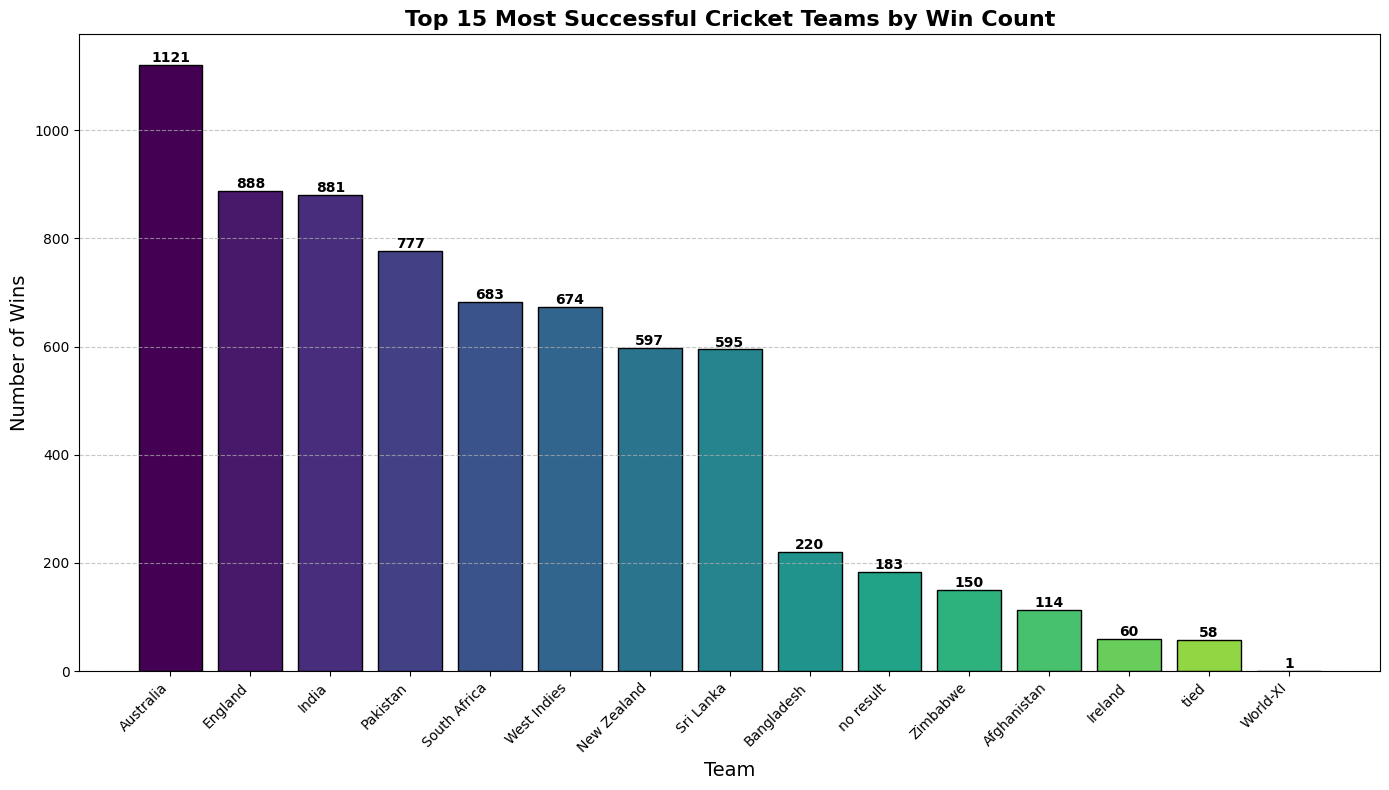

In [13]:
# Create a figure:
plt.figure(figsize=(14, 8))

# Create a bar chart with custom colors
bars = plt.bar(
    top_teams['Team'], 
    top_teams['Wins'], 
    color=plt.cm.viridis(np.linspace(0, 0.9, len(top_teams))),  # Color gradient
    edgecolor='black',
    linewidth=1
)

# Add win count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5, f'{int(height)}',ha='center', fontweight='bold')

# Add chart title and labels
plt.title('Top 15 Most Successful Cricket Teams by Win Count', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**3.  Analyze win percentages by format:**

Now, examine how teams perform across different formats to identify format specialists and all-format dominant teams.

In [14]:
# Group data by winner and format, then count wins
format_wins = data.groupby(['winner', 'format']).size().reset_index(name='Format_Wins')
format_wins

,winner,format,Format_Wins
0,Afghanistan,ODI,58
1,Afghanistan,T20I,52
2,Afghanistan,Test,4
3,Australia,ODI,597
4,Australia,T20I,105
5,Australia,Test,419
6,Bangladesh,ODI,142
7,Bangladesh,T20I,56
8,Bangladesh,Test,22
9,England,ODI,386


In [15]:
# Get total matches by format
format_totals = data.groupby('format').size().reset_index(name='Total_Format_Matches')
format_totals

,format,Total_Format_Matches
0,ODI,4130
1,T20I,1082
2,Test,1790


In [16]:
# Merge the data
format_analysis = pd.merge(format_wins, format_totals, on='format')
format_analysis

,winner,format,Format_Wins,Total_Format_Matches
0,Afghanistan,ODI,58,4130
1,Afghanistan,T20I,52,1082
2,Afghanistan,Test,4,1790
3,Australia,ODI,597,4130
4,Australia,T20I,105,1082
5,Australia,Test,419,1790
6,Bangladesh,ODI,142,4130
7,Bangladesh,T20I,56,1082
8,Bangladesh,Test,22,1790
9,England,ODI,386,4130


In [17]:
# Calculate win percentage by format
format_analysis['Win_Percentage'] = (format_analysis['Format_Wins'] / format_analysis['Total_Format_Matches'] * 100).round(1)
format_analysis

,winner,format,Format_Wins,Total_Format_Matches,Win_Percentage
0,Afghanistan,ODI,58,4130,1.4
1,Afghanistan,T20I,52,1082,4.8
2,Afghanistan,Test,4,1790,0.2
3,Australia,ODI,597,4130,14.5
4,Australia,T20I,105,1082,9.7
5,Australia,Test,419,1790,23.4
6,Bangladesh,ODI,142,4130,3.4
7,Bangladesh,T20I,56,1082,5.2
8,Bangladesh,Test,22,1790,1.2
9,England,ODI,386,4130,9.3


In [18]:
# Get the top 10 teams overall
top10_teams = team_wins.head(10)['Team'].tolist()
top10_teams

['Australia',
 'England',
 'India',
 'Pakistan',
 'South Africa',
 'West Indies',
 'New Zealand',
 'Sri Lanka',
 'Bangladesh',
 'no result']

In [19]:
# Filter for top 10 teams
top_teams_format = format_analysis[format_analysis['winner'].isin(top10_teams)]
top_teams_format

,winner,format,Format_Wins,Total_Format_Matches,Win_Percentage
3,Australia,ODI,597,4130,14.5
4,Australia,T20I,105,1082,9.7
5,Australia,Test,419,1790,23.4
6,Bangladesh,ODI,142,4130,3.4
7,Bangladesh,T20I,56,1082,5.2
8,Bangladesh,Test,22,1790,1.2
9,England,ODI,386,4130,9.3
10,England,T20I,102,1082,9.4
11,England,Test,400,1790,22.3
12,India,ODI,543,4130,13.1


In [20]:
# Create a pivot table for easier visualization
format_pivot = top_teams_format.pivot(index='winner', columns='format', values='Win_Percentage')
format_pivot

format,ODI,T20I,Test
winner,,,
Australia,14.5,9.7,23.4
Bangladesh,3.4,5.2,1.2
England,9.3,9.4,22.3
India,13.1,14.5,10.1
New Zealand,9.0,9.7,6.6
Pakistan,12.0,12.2,8.4
South Africa,9.6,9.5,10.3
Sri Lanka,9.9,7.5,5.9
West Indies,9.7,8.3,10.3


In [21]:
# Fill NaN values with 0 (teams that haven't won in a particular format)
format_pivot = format_pivot.fillna(0)
format_pivot

format,ODI,T20I,Test
winner,,,
Australia,14.5,9.7,23.4
Bangladesh,3.4,5.2,1.2
England,9.3,9.4,22.3
India,13.1,14.5,10.1
New Zealand,9.0,9.7,6.6
Pakistan,12.0,12.2,8.4
South Africa,9.6,9.5,10.3
Sri Lanka,9.9,7.5,5.9
West Indies,9.7,8.3,10.3


In [22]:
# Display the format-specific win percentages
print("\nWin Percentages by Format for Top 10 Teams:")
print(format_pivot)


Win Percentages by Format for Top 10 Teams:
format        ODI   T20I   Test 
winner                          
Australia     14.5    9.7   23.4
Bangladesh     3.4    5.2    1.2
England        9.3    9.4   22.3
India         13.1   14.5   10.1
New Zealand    9.0    9.7    6.6
Pakistan      12.0   12.2    8.4
South Africa   9.6    9.5   10.3
Sri Lanka      9.9    7.5    5.9
West Indies    9.7    8.3   10.3
no result      3.7    2.8    0.0


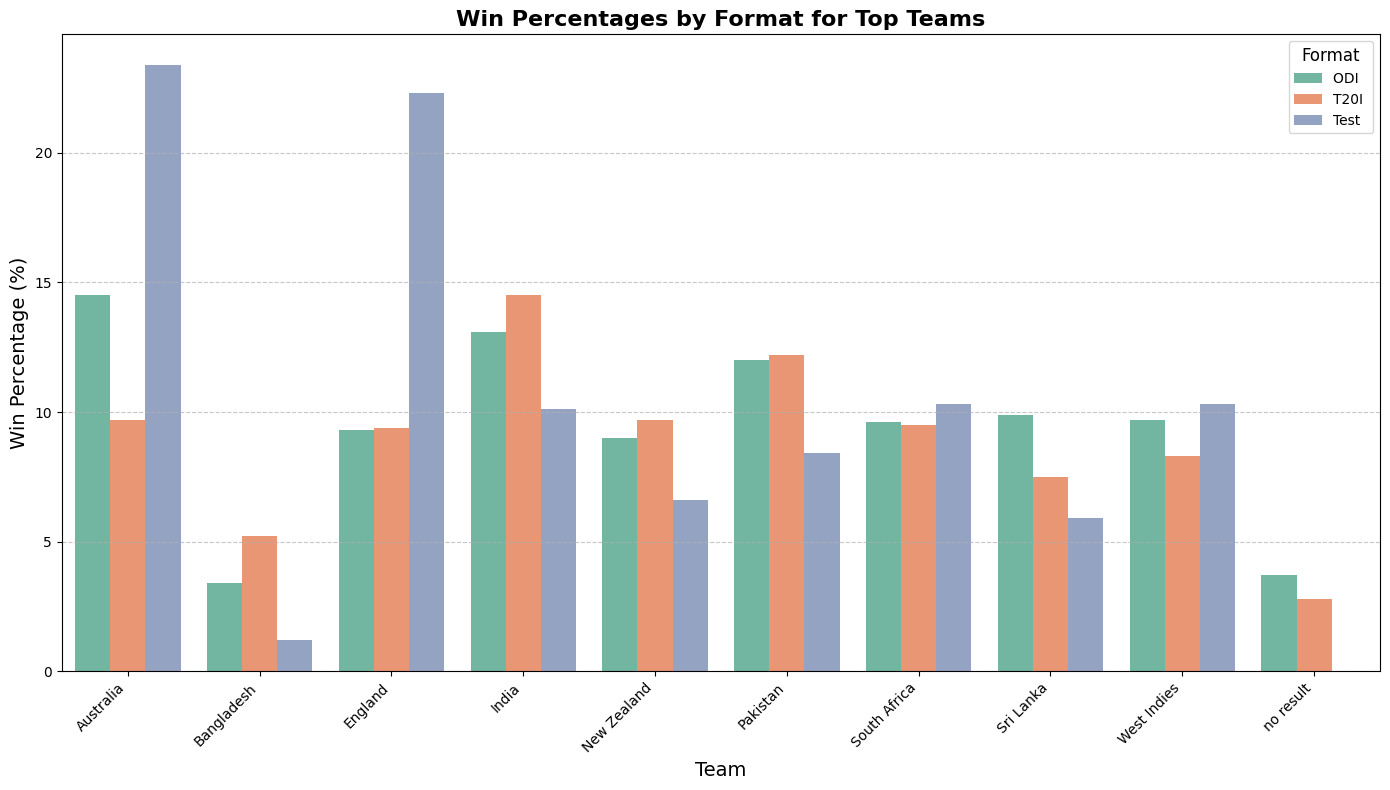

In [23]:
# Create a grouped bar chart to compare format performance
plt.figure(figsize=(14, 8))

# Get the data in the right format for plotting
plot_data = top_teams_format.copy()

# Create the grouped bar chart using Seaborn
sns.barplot(
    x='winner', 
    y='Win_Percentage', 
    hue='format',
    data=plot_data,
    palette='Set2'
)

# Add chart title and labels
plt.title('Win Percentages by Format for Top Teams', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Win Percentage (%)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend(title='Format', title_fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**4. Analyze team performance over time:**

Now, examine how team dominance has evolved over time to identify rising stars and declining powers.

In [24]:
# Group data by winner and year, then count wins
yearly_wins = data.groupby(['winner', 'year']).size().reset_index(name='Year_Wins')
yearly_wins

,winner,year,Year_Wins
0,Afghanistan,2010,2
1,Afghanistan,2014,3
2,Afghanistan,2015,8
3,Afghanistan,2016,8
4,Afghanistan,2017,13
...,...,...,...
745,tied,2019,3
746,tied,2020,4
747,tied,2022,2
748,tied,2023,1


In [25]:
# Get total matches by year
yearly_totals = data.groupby('year').size().reset_index(name='Year_Total')
yearly_totals

,year,Year_Total
0,1850,29
1,1877,2
2,1879,1
3,1880,1
4,1882,3
...,...,...
130,2021,192
131,2022,241
132,2023,227
133,2024,219


In [26]:
# Merge the data
yearly_analysis = pd.merge(yearly_wins, yearly_totals, on='year')
yearly_analysis

,winner,year,Year_Wins,Year_Total
0,Afghanistan,2010,2,197
1,Afghanistan,2014,3,182
2,Afghanistan,2015,8,192
3,Afghanistan,2016,8,195
4,Afghanistan,2017,13,203
...,...,...,...,...
745,tied,2019,3,213
746,tied,2020,4,100
747,tied,2022,2,241
748,tied,2023,1,227


In [27]:
# Calculate win percentage by year
yearly_analysis['Win_Percentage'] = (yearly_analysis['Year_Wins'] / yearly_analysis['Year_Total'] * 100).round(1)
yearly_analysis

,winner,year,Year_Wins,Year_Total,Win_Percentage
0,Afghanistan,2010,2,197,1.0
1,Afghanistan,2014,3,182,1.6
2,Afghanistan,2015,8,192,4.2
3,Afghanistan,2016,8,195,4.1
4,Afghanistan,2017,13,203,6.4
...,...,...,...,...,...
745,tied,2019,3,213,1.4
746,tied,2020,4,100,4.0
747,tied,2022,2,241,0.8
748,tied,2023,1,227,0.4


In [28]:
# Filter for top 5 teams for clearer visualization
top5_teams = team_wins.head(5)['Team'].tolist()
print(top5_teams)
print("|"*80)
top_teams_yearly = yearly_analysis[yearly_analysis['winner'].isin(top5_teams)]
print(top_teams_yearly)

['Australia', 'England', 'India', 'Pakistan', 'South Africa']
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
           winner  year  Year_Wins  Year_Total  Win_Percentage
13      Australia  1850         16          29            55.2
14      Australia  1877          1           2            50.0
15      Australia  1879          1           1           100.0
16      Australia  1882          3           3           100.0
17      Australia  1883          1           3            33.3
..            ...   ...        ...         ...             ...
520  South Africa  2021         21         192            10.9
521  South Africa  2022         21         241             8.7
522  South Africa  2023         19         227             8.4
523  South Africa  2024         18         219             8.2
524  South Africa  2025          3          53             5.7

[416 rows x 5 columns]


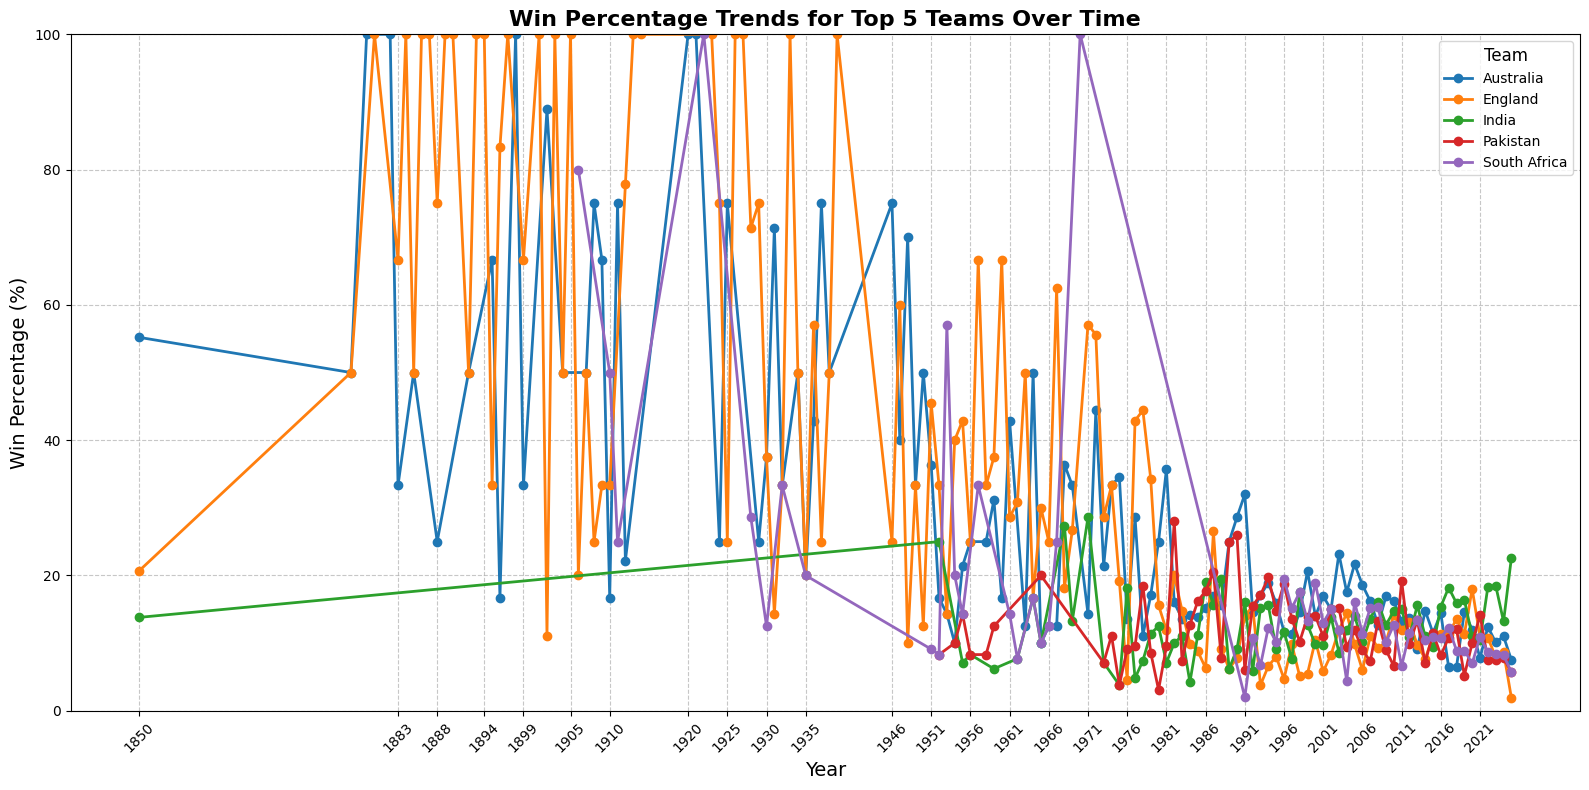

In [29]:
# Create a line chart to show performance trends over time:
plt.figure(figsize=(16, 8))

# Create the line chart
for team in top5_teams:
    team_data = top_teams_yearly[top_teams_yearly['winner'] == team]
    plt.plot(
        team_data['year'], 
        team_data['Win_Percentage'], 
        marker='o', 
        linewidth=2, 
        label=team
    )

# Add chart title and labels
plt.title('Win Percentage Trends for Top 5 Teams Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Win Percentage (%)', fontsize=14)

# Add a legend
plt.legend(title='Team', title_fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set reasonable y-axis limits
plt.ylim(0, 100)

# Show only every 5th year on x-axis to avoid crowding
years = sorted(yearly_analysis['year'].unique())
plt.xticks([y for i, y in enumerate(years) if i % 5 == 0], rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**5. Analyze home vs. away performance:** 

Let's examine how teams perform at home versus away to identify teams with strong home advantage or good traveling records.

In [30]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns'],
      dtype='object')

In [31]:
data.head(10)

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,2007-Nov,5,2007,Nov,India,False,6.0,0.0,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,2006-Jan,4,2006,Jan,Pakistan,False,0.0,341.0,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,2005-Mar,5,2005,Mar,India,False,0.0,168.0,False
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,2005-Mar,5,2005,Mar,India,False,0.0,195.0,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,2004-Apr,4,2004,Apr,Pakistan,False,0.0,131.0,False
10,Pakistan,India,Pakistan,9 wickets,Lahore,Test,1695,0,0,2004-04-05,2004-Apr,4,2004,Apr,Pakistan,False,9.0,0.0,False
11,Pakistan,India,India,inns & 52 runs,Multan,Test,1693,0,0,2004-03-28,2004-Mar,5,2004,Mar,Pakistan,False,0.0,52.0,False
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test,1444,0,0,1999-02-16,1999-Feb,5,1999,Feb,India,False,0.0,46.0,False
13,India,Pakistan,India,212 runs,Delhi,Test,1443,0,0,1999-02-04,1999-Feb,4,1999,Feb,India,False,0.0,212.0,False
14,India,Pakistan,Pakistan,12 runs,Chennai,Test,1442,0,0,1999-01-28,1999-Jan,4,1999,Jan,India,False,0.0,12.0,False


In [32]:
# If winner and ground_country are same then it is home win:
data[data["winner"] ==data["ground_country"]]

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,2007-Nov,5,2007,Nov,India,False,6.0,0.0,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,2006-Jan,4,2006,Jan,Pakistan,False,0.0,341.0,False
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,2005-Mar,5,2005,Mar,India,False,0.0,195.0,False
10,Pakistan,India,Pakistan,9 wickets,Lahore,Test,1695,0,0,2004-04-05,2004-Apr,4,2004,Apr,Pakistan,False,9.0,0.0,False
13,India,Pakistan,India,212 runs,Delhi,Test,1443,0,0,1999-02-04,1999-Feb,4,1999,Feb,India,False,0.0,212.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,West Indies,Zimbabwe,West Indies,8 wickets,North Sound,T20I,0,0,305,2013-03-02,2013-Mar,1,2013,Mar,West Indies,False,8.0,0.0,False
7788,Australia,ICC World XI,Australia,210 runs,Sydney,Test,1768,0,0,2005-10-14,2005-Oct,4,2005,Oct,Australia,False,0.0,210.0,False
7789,Australia,ICC World XI,Australia,156 runs,Melbourne (Docklands),ODI,0,2284,0,2005-10-09,2005-Oct,1,2005,Oct,Australia,False,0.0,156.0,False
7790,Australia,ICC World XI,Australia,55 runs,Melbourne (Docklands),ODI,0,2283,0,2005-10-07,2005-Oct,1,2005,Oct,Australia,False,0.0,55.0,False


In [33]:
# If winner country is not same as ground_country then it is away win:
data[data["winner"] != data["ground_country"]]

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,2005-Mar,5,2005,Mar,India,False,0.0,168.0,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,2004-Apr,4,2004,Apr,Pakistan,False,0.0,131.0,False
11,Pakistan,India,India,inns & 52 runs,Multan,Test,1693,0,0,2004-03-28,2004-Mar,5,2004,Mar,Pakistan,False,0.0,52.0,False
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test,1444,0,0,1999-02-16,1999-Feb,5,1999,Feb,India,False,0.0,46.0,False
14,India,Pakistan,Pakistan,12 runs,Chennai,Test,1442,0,0,1999-01-28,1999-Jan,4,1999,Jan,India,False,0.0,12.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,West Indies,Zimbabwe,West Indies,10 wickets,Birmingham,ODI,0,220,0,1983-06-20,1983-Jun,1,1983,Jun,England,True,10.0,0.0,False
7783,West Indies,Zimbabwe,West Indies,8 wickets,Worcester,ODI,0,208,0,1983-06-13,1983-Jun,1,1983,Jun,England,True,8.0,0.0,False
7784,West Indies,Zimbabwe,West Indies,31 runs,Hobart,T20I,0,0,1834,2022-10-19,2022-Oct,1,2022,Oct,Australia,True,0.0,31.0,False
7787,West Indies,Zimbabwe,Zimbabwe,26 runs,Port of Spain,T20I,0,0,150,2010-02-28,2010-Feb,1,2010,Feb,West Indies,False,0.0,26.0,False


In [34]:
# If we want even more detailed and conscious analysis then, we can also do something like this:

# Create a column to identify home wins:
data['is_home_win'] = (data['winner'] == data['team_1']) & (data['team_1'] == data['ground_country']) | \
                      (data['winner'] == data['team_2']) & (data['team_2'] == data['ground_country'])

# Create a column to identify away wins
data['is_away_win'] = (data['winner'] == data['team_1']) & (data['team_1'] != data['ground_country']) | \
                      (data['winner'] == data['team_2']) & (data['team_2'] != data['ground_country'])
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns',
       'is_home_win', 'is_away_win'],
      dtype='object')

In [35]:
data[data["is_away_win"] == True]

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,5,2005,Mar,India,False,0.0,168.0,False,False,True
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,...,4,2004,Apr,Pakistan,False,0.0,131.0,False,False,True
11,Pakistan,India,India,inns & 52 runs,Multan,Test,1693,0,0,2004-03-28,...,5,2004,Mar,Pakistan,False,0.0,52.0,False,False,True
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test,1444,0,0,1999-02-16,...,5,1999,Feb,India,False,0.0,46.0,False,False,True
14,India,Pakistan,Pakistan,12 runs,Chennai,Test,1442,0,0,1999-01-28,...,4,1999,Jan,India,False,0.0,12.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,West Indies,Zimbabwe,West Indies,10 wickets,Birmingham,ODI,0,220,0,1983-06-20,...,1,1983,Jun,England,True,10.0,0.0,False,False,True
7783,West Indies,Zimbabwe,West Indies,8 wickets,Worcester,ODI,0,208,0,1983-06-13,...,1,1983,Jun,England,True,8.0,0.0,False,False,True
7784,West Indies,Zimbabwe,West Indies,31 runs,Hobart,T20I,0,0,1834,2022-10-19,...,1,2022,Oct,Australia,True,0.0,31.0,False,False,True
7787,West Indies,Zimbabwe,Zimbabwe,26 runs,Port of Spain,T20I,0,0,150,2010-02-28,...,1,2010,Feb,West Indies,False,0.0,26.0,False,False,True


In [36]:
data.head(10)

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,...,5,2007,Nov,India,False,6.0,0.0,False,True,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,...,4,2006,Jan,Pakistan,False,0.0,341.0,False,True,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,5,2005,Mar,India,False,0.0,168.0,False,False,True
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,...,5,2005,Mar,India,False,0.0,195.0,False,True,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,...,4,2004,Apr,Pakistan,False,0.0,131.0,False,False,True
10,Pakistan,India,Pakistan,9 wickets,Lahore,Test,1695,0,0,2004-04-05,...,4,2004,Apr,Pakistan,False,9.0,0.0,False,True,False
11,Pakistan,India,India,inns & 52 runs,Multan,Test,1693,0,0,2004-03-28,...,5,2004,Mar,Pakistan,False,0.0,52.0,False,False,True
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test,1444,0,0,1999-02-16,...,5,1999,Feb,India,False,0.0,46.0,False,False,True
13,India,Pakistan,India,212 runs,Delhi,Test,1443,0,0,1999-02-04,...,4,1999,Feb,India,False,0.0,212.0,False,True,False
14,India,Pakistan,Pakistan,12 runs,Chennai,Test,1442,0,0,1999-01-28,...,4,1999,Jan,India,False,0.0,12.0,False,False,True


In [37]:
data[data["is_away_win"] == True]

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,5,2005,Mar,India,False,0.0,168.0,False,False,True
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,...,4,2004,Apr,Pakistan,False,0.0,131.0,False,False,True
11,Pakistan,India,India,inns & 52 runs,Multan,Test,1693,0,0,2004-03-28,...,5,2004,Mar,Pakistan,False,0.0,52.0,False,False,True
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test,1444,0,0,1999-02-16,...,5,1999,Feb,India,False,0.0,46.0,False,False,True
14,India,Pakistan,Pakistan,12 runs,Chennai,Test,1442,0,0,1999-01-28,...,4,1999,Jan,India,False,0.0,12.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,West Indies,Zimbabwe,West Indies,10 wickets,Birmingham,ODI,0,220,0,1983-06-20,...,1,1983,Jun,England,True,10.0,0.0,False,False,True
7783,West Indies,Zimbabwe,West Indies,8 wickets,Worcester,ODI,0,208,0,1983-06-13,...,1,1983,Jun,England,True,8.0,0.0,False,False,True
7784,West Indies,Zimbabwe,West Indies,31 runs,Hobart,T20I,0,0,1834,2022-10-19,...,1,2022,Oct,Australia,True,0.0,31.0,False,False,True
7787,West Indies,Zimbabwe,Zimbabwe,26 runs,Port of Spain,T20I,0,0,150,2010-02-28,...,1,2010,Feb,West Indies,False,0.0,26.0,False,False,True


In [38]:
data.sample(2)

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
3848,Australia,England,Australia,8 wickets,Melbourne,Test,138,0,0,1921-02-11,...,6,1921,Feb,Australia,False,8.0,0.0,False,True,False
5597,Bangladesh,Zimbabwe,Bangladesh,42 runs,Khulna,T20I,0,0,481,2016-01-17,...,1,2016,Jan,Bangladesh,False,0.0,42.0,False,True,False


In [39]:
# Group by winner and count home/away wins:
home_away_wins = data.groupby('winner').agg({'is_home_win': 'sum','is_away_win': 'sum'}).reset_index()
home_away_wins

,winner,is_home_win,is_away_win
0,Afghanistan,0,114
1,Australia,585,536
2,Bangladesh,131,89
3,England,444,444
4,India,366,515
5,Ireland,20,40
6,New Zealand,265,332
7,Pakistan,211,566
8,South Africa,289,394
9,Sri Lanka,273,322


In [40]:
# Rename columns for clarity
home_away_wins.columns = ['Team', 'Home_Wins', 'Away_Wins']

# Calculate total wins
home_away_wins['Total_Wins'] = home_away_wins['Home_Wins'] + home_away_wins['Away_Wins']

# Calculate home win percentage
home_away_wins['Home_Win_Percentage'] = (home_away_wins['Home_Wins'] / home_away_wins['Total_Wins'] * 100).round(1)

# Filter for teams with at least 20 total wins
significant_teams = home_away_wins[home_away_wins['Total_Wins'] >= 20].copy()

# Sort by total wins
significant_teams = significant_teams.sort_values('Total_Wins', ascending=False)

# Display home vs. away performance
print("\nHome vs. Away Performance for Teams with at least 20 wins:")
print(significant_teams[['Team', 'Home_Wins', 'Away_Wins', 'Total_Wins', 'Home_Win_Percentage']].head(15))


Home vs. Away Performance for Teams with at least 20 wins:
            Team  Home_Wins  Away_Wins  Total_Wins  Home_Win_Percentage
1      Australia        585        536        1121                 52.2
3        England        444        444         888                 50.0
4          India        366        515         881                 41.5
7       Pakistan        211        566         777                 27.2
8   South Africa        289        394         683                 42.3
10   West Indies        280        394         674                 41.5
6    New Zealand        265        332         597                 44.4
9      Sri Lanka        273        322         595                 45.9
2     Bangladesh        131         89         220                 59.5
12      Zimbabwe         80         70         150                 53.3
0    Afghanistan          0        114         114                  0.0
5        Ireland         20         40          60                 33.3


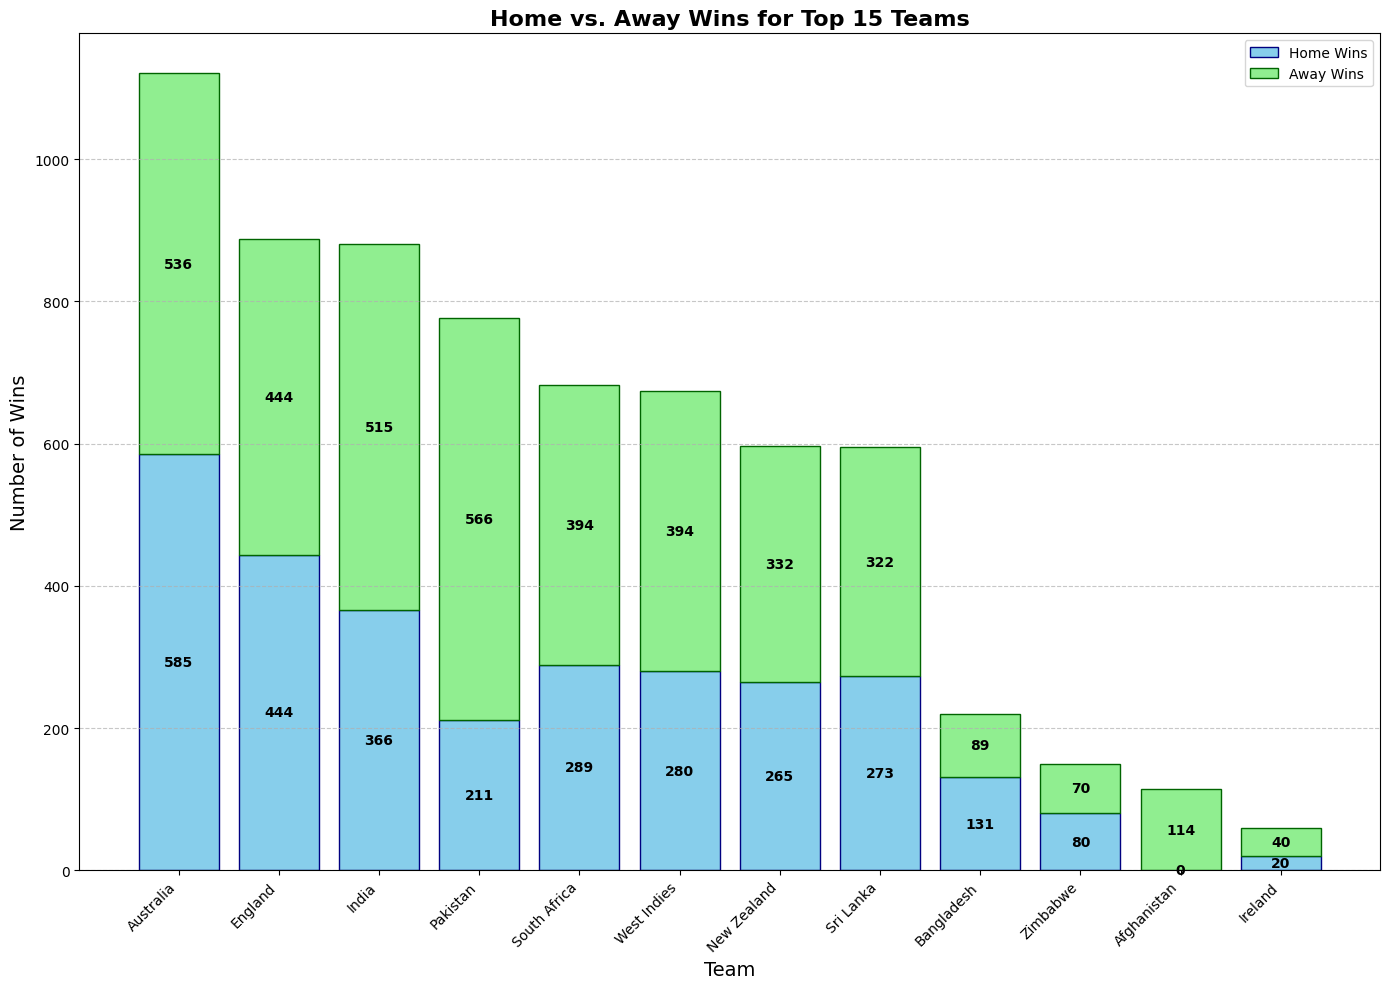

In [41]:
# Create a stacked bar chart to show home vs. away wins
plt.figure(figsize=(14, 10))

# Get top 15 teams by total wins
top15_home_away = significant_teams.head(15).copy()

# Create the stacked bar chart
bar_width = 0.8
indices = np.arange(len(top15_home_away))

# Create bars
plt.bar(indices, top15_home_away['Home_Wins'], bar_width, 
        label='Home Wins', color='skyblue', edgecolor='navy')
plt.bar(indices, top15_home_away['Away_Wins'], bar_width,
        bottom=top15_home_away['Home_Wins'], label='Away Wins', 
        color='lightgreen', edgecolor='darkgreen')

# Add team labels
plt.xticks(indices, top15_home_away['Team'], rotation=45, ha='right')

# Add win count labels
for i, (home_wins, away_wins) in enumerate(zip(top15_home_away['Home_Wins'], top15_home_away['Away_Wins'])):
    # Label for home wins
    plt.text(i, home_wins/2, f"{int(home_wins)}", ha='center', va='center', fontweight='bold')
    # Label for away wins
    plt.text(i, home_wins + away_wins/2, f"{int(away_wins)}", ha='center', va='center', fontweight='bold')

# Add chart title and labels
plt.title('Home vs. Away Wins for Top 15 Teams', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)

# Add a legend
plt.legend(loc='upper right')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**6. Analyze win margins to identify dominant victories:**

Now, examine the average win margins for top teams to identify those that not only win frequently but win convincingly.

In [42]:
data.head(3)

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,...,5,2007,Nov,India,False,6.0,0.0,False,True,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,...,4,2006,Jan,Pakistan,False,0.0,341.0,False,True,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,5,2005,Mar,India,False,0.0,168.0,False,False,True


In [43]:
data[data["won_by_runs"] > 0]

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,...,4,2006,Jan,Pakistan,False,0.0,341.0,False,True,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,5,2005,Mar,India,False,0.0,168.0,False,False,True
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,...,5,2005,Mar,India,False,0.0,195.0,False,True,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,...,4,2004,Apr,Pakistan,False,0.0,131.0,False,False,True
11,Pakistan,India,India,inns & 52 runs,Multan,Test,1693,0,0,2004-03-28,...,5,2004,Mar,Pakistan,False,0.0,52.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,Australia,ICC World XI,Australia,210 runs,Sydney,Test,1768,0,0,2005-10-14,...,4,2005,Oct,Australia,False,0.0,210.0,False,True,False
7789,Australia,ICC World XI,Australia,156 runs,Melbourne (Docklands),ODI,0,2284,0,2005-10-09,...,1,2005,Oct,Australia,False,0.0,156.0,False,True,False
7790,Australia,ICC World XI,Australia,55 runs,Melbourne (Docklands),ODI,0,2283,0,2005-10-07,...,1,2005,Oct,Australia,False,0.0,55.0,False,True,False
7791,Australia,ICC World XI,Australia,93 runs,Melbourne (Docklands),ODI,0,2282,0,2005-10-05,...,1,2005,Oct,Australia,False,0.0,93.0,False,True,False


In [44]:
# Calculate average win margins by team:
team_margins = data.groupby('winner').agg({
    'won_by_runs': lambda x: x[x > 0].mean(),
    'won_by_wickets': lambda x: x[x > 0].mean()
}).reset_index()
team_margins

,winner,won_by_runs,won_by_wickets
0,Afghanistan,59.309859,5.904762
1,Australia,97.908243,6.484979
2,Bangladesh,71.740741,5.787037
3,England,94.344902,6.312958
4,India,83.458050,6.219114
5,Ireland,39.350000,5.225000
6,New Zealand,71.971698,6.057471
7,Pakistan,72.697561,6.206897
8,South Africa,93.681818,6.350340
9,Sri Lanka,82.235110,6.071161


In [45]:
# Rename columns for clarity
team_margins.columns = ['Team', 'Avg_Runs_Margin', 'Avg_Wickets_Margin']
team_margins

,Team,Avg_Runs_Margin,Avg_Wickets_Margin
0,Afghanistan,59.309859,5.904762
1,Australia,97.908243,6.484979
2,Bangladesh,71.740741,5.787037
3,England,94.344902,6.312958
4,India,83.458050,6.219114
5,Ireland,39.350000,5.225000
6,New Zealand,71.971698,6.057471
7,Pakistan,72.697561,6.206897
8,South Africa,93.681818,6.350340
9,Sri Lanka,82.235110,6.071161


In [46]:
# Fill NaN values with 0 (teams that haven't won by runs or wickets)
team_margins = team_margins.fillna(0)
team_margins

,Team,Avg_Runs_Margin,Avg_Wickets_Margin
0,Afghanistan,59.309859,5.904762
1,Australia,97.908243,6.484979
2,Bangladesh,71.740741,5.787037
3,England,94.344902,6.312958
4,India,83.458050,6.219114
5,Ireland,39.350000,5.225000
6,New Zealand,71.971698,6.057471
7,Pakistan,72.697561,6.206897
8,South Africa,93.681818,6.350340
9,Sri Lanka,82.235110,6.071161


In [47]:
# Merge with win counts
team_performance = pd.merge(team_wins, team_margins, left_on='Team', right_on='Team')
team_performance

,Team,Wins,Win_Percentage,Avg_Runs_Margin,Avg_Wickets_Margin
0,Australia,1121,16.0,97.908243,6.484979
1,England,888,12.7,94.344902,6.312958
2,India,881,12.6,83.458050,6.219114
3,Pakistan,777,11.1,72.697561,6.206897
4,South Africa,683,9.8,93.681818,6.350340
5,West Indies,674,9.6,87.031746,6.554572
6,New Zealand,597,8.5,71.971698,6.057471
7,Sri Lanka,595,8.5,82.235110,6.071161
8,Bangladesh,220,3.1,71.740741,5.787037
9,no result,183,2.6,0.000000,0.000000


In [48]:
# Filter for teams with at least 20 wins for meaningful analysis
significant_performance = team_performance[team_performance['Wins'] >= 20].copy()
significant_performance

,Team,Wins,Win_Percentage,Avg_Runs_Margin,Avg_Wickets_Margin
0,Australia,1121,16.0,97.908243,6.484979
1,England,888,12.7,94.344902,6.312958
2,India,881,12.6,83.458050,6.219114
3,Pakistan,777,11.1,72.697561,6.206897
4,South Africa,683,9.8,93.681818,6.350340
5,West Indies,674,9.6,87.031746,6.554572
6,New Zealand,597,8.5,71.971698,6.057471
7,Sri Lanka,595,8.5,82.235110,6.071161
8,Bangladesh,220,3.1,71.740741,5.787037
9,no result,183,2.6,0.000000,0.000000


In [49]:
# Display team performance metrics
print("\nTeam Performance Metrics (Teams with at least 20 wins):")
print(significant_performance[['Team', 'Wins', 'Avg_Runs_Margin', 'Avg_Wickets_Margin']].head(15))


Team Performance Metrics (Teams with at least 20 wins):
            Team  Wins  Avg_Runs_Margin  Avg_Wickets_Margin
0      Australia  1121        97.908243            6.484979
1        England   888        94.344902            6.312958
2          India   881        83.458050            6.219114
3       Pakistan   777        72.697561            6.206897
4   South Africa   683        93.681818            6.350340
5    West Indies   674        87.031746            6.554572
6    New Zealand   597        71.971698            6.057471
7      Sri Lanka   595        82.235110            6.071161
8     Bangladesh   220        71.740741            5.787037
9      no result   183         0.000000            0.000000
10      Zimbabwe   150        50.180556            5.239437
11   Afghanistan   114        59.309859            5.904762
12       Ireland    60        39.350000            5.225000
13          tied    58         0.000000            0.000000


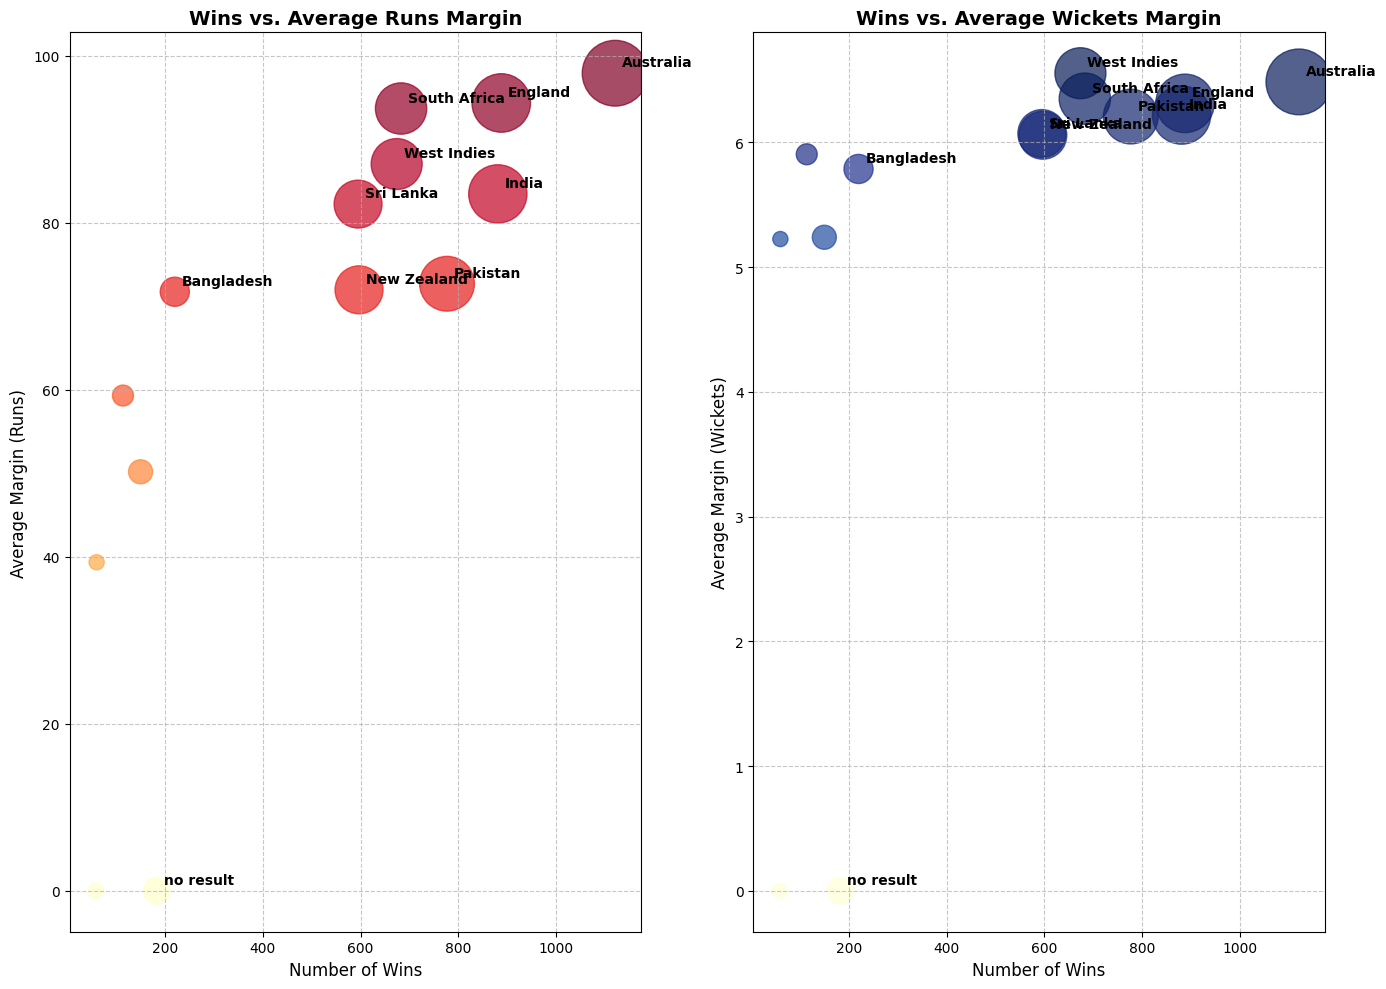

In [50]:
# Create a scatter plot to visualize the relationship between wins and margins
plt.figure(figsize=(14, 10))

# Create the scatter plot for runs margin
plt.subplot(1, 2, 1)
plt.scatter(
    significant_performance['Wins'], 
    significant_performance['Avg_Runs_Margin'],
    s=significant_performance['Wins'] * 2,  # Size proportional to wins
    alpha=0.7,
    c=significant_performance['Avg_Runs_Margin'],  # Color by margin
    cmap='YlOrRd'
)

# Add team labels for top teams
for i, row in significant_performance.nlargest(10, 'Wins').iterrows():
    plt.annotate(
        row['Team'], 
        (row['Wins'], row['Avg_Runs_Margin']),
        xytext=(5, 5),
        textcoords='offset points',
        fontweight='bold'
    )

# Add chart title and labels
plt.title('Wins vs. Average Runs Margin', fontsize=14, fontweight='bold')
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Average Margin (Runs)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# Create the scatter plot for wickets margin
plt.subplot(1, 2, 2)
plt.scatter(
    significant_performance['Wins'], 
    significant_performance['Avg_Wickets_Margin'],
    s=significant_performance['Wins'] * 2,  # Size proportional to wins
    alpha=0.7,
    c=significant_performance['Avg_Wickets_Margin'],  # Color by margin
    cmap='YlGnBu'
)

# Add team labels for top teams
for i, row in significant_performance.nlargest(10, 'Wins').iterrows():
    plt.annotate(
        row['Team'], 
        (row['Wins'], row['Avg_Wickets_Margin']),
        xytext=(5, 5),
        textcoords='offset points',
        fontweight='bold'
    )

# Add chart title and labels
plt.title('Wins vs. Average Wickets Margin', fontsize=14, fontweight='bold')
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Average Margin (Wickets)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**7. Identify underdog teams with potential:**

Let's identify teams that might be underdogs but show potential for growth based on recent performance trends.

In [51]:
# Calculate recent performance (last 5 years)
max_year = data['year'].max()
recent_data = data[data['year'] >= max_year - 5]

# Count recent wins
recent_wins = recent_data['winner'].value_counts().reset_index()
recent_wins.columns = ['Team', 'Recent_Wins']

# Calculate total matches in recent period
recent_total = len(recent_data)

# Calculate recent win percentage
recent_wins['Recent_Win_Percentage'] = (recent_wins['Recent_Wins'] / recent_total * 100).round(1)

# Merge with overall performance
team_trends = pd.merge(team_wins, recent_wins, on='Team', how='left')

# Fill NaN values with 0 (teams with no recent wins)
team_trends['Recent_Wins'] = team_trends['Recent_Wins'].fillna(0)
team_trends['Recent_Win_Percentage'] = team_trends['Recent_Win_Percentage'].fillna(0)

# Calculate improvement ratio (recent win % / overall win %)
team_trends['Improvement_Ratio'] = (team_trends['Recent_Win_Percentage'] / team_trends['Win_Percentage']).round(2)

# Filter for teams with at least 5 wins overall
potential_teams = team_trends[team_trends['Wins'] >= 5].copy()

# Sort by improvement ratio to identify rising teams
potential_teams = potential_teams.sort_values('Improvement_Ratio', ascending=False)

In [52]:
# Display teams with highest improvement ratios
print("\nTeams with Highest Improvement Ratios (Recent vs Overall Performance):")
print(potential_teams[['Team', 'Wins', 'Win_Percentage', 'Recent_Wins', 
                      'Recent_Win_Percentage', 'Improvement_Ratio']].head(10))


Teams with Highest Improvement Ratios (Recent vs Overall Performance):
            Team  Wins  Win_Percentage  Recent_Wins  Recent_Win_Percentage  \
12       Ireland    60             0.9         29.0                    2.8   
11   Afghanistan   114             1.6         50.0                    4.8   
8     Bangladesh   220             3.1         76.0                    7.4   
9      no result   183             2.6         37.0                    3.6   
10      Zimbabwe   150             2.1         28.0                    2.7   
13          tied    58             0.8         10.0                    1.0   
2          India   881            12.6        158.0                   15.3   
6    New Zealand   597             8.5        104.0                   10.1   
7      Sri Lanka   595             8.5         79.0                    7.7   
4   South Africa   683             9.8         89.0                    8.6   

    Improvement_Ratio  
12               3.11  
11               3.00

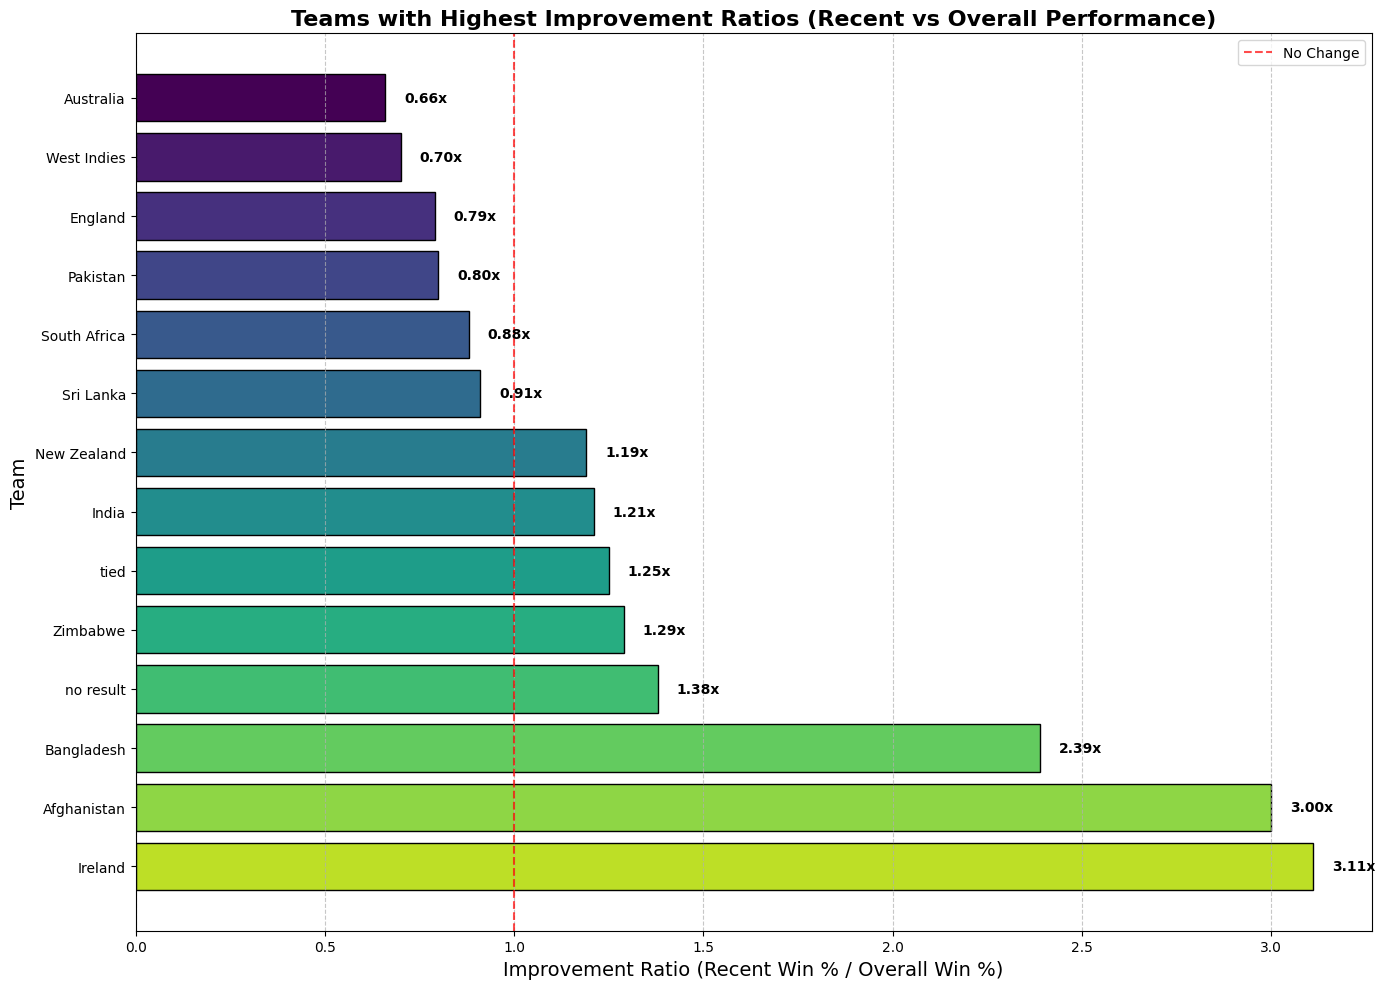

In [53]:
# Create a horizontal bar chart to visualize improvement ratios
plt.figure(figsize=(14, 10))

# Get top 15 teams by improvement ratio
top_improvers = potential_teams.head(15).copy()

# Create horizontal bars
bars = plt.barh(
    top_improvers['Team'], 
    top_improvers['Improvement_Ratio'],
    color=plt.cm.viridis(np.linspace(0.9, 0, len(top_improvers))),  # Reverse color gradient
    edgecolor='black',
    linewidth=1
)

# Add ratio labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.05, 
        bar.get_y() + bar.get_height()/2, 
        f'{width:.2f}x',
        va='center', 
        fontweight='bold'
    )

# Add a vertical line at ratio = 1.0 (no improvement)
plt.axvline(x=1.0, color='red', linestyle='--', alpha=0.7, label='No Change')

# Add chart title and labels
plt.title('Teams with Highest Improvement Ratios (Recent vs Overall Performance)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Improvement Ratio (Recent Win % / Overall Win %)', fontsize=14)
plt.ylabel('Team', fontsize=14)

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add a legend
plt.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**8.  Visualize team dominance:**

Now, create a comprehensive visualization that combines `win counts`, `win percentages`, and `recent performance` to provide a complete picture of team dominance.

In [54]:
# Prepare data for the comprehensive visualization
top15_teams = team_trends.nlargest(15, 'Wins').copy()
top15_teams

,Team,Wins,Win_Percentage,Recent_Wins,Recent_Win_Percentage,Improvement_Ratio
0,Australia,1121,16.0,108.0,10.5,0.66
1,England,888,12.7,103.0,10.0,0.79
2,India,881,12.6,158.0,15.3,1.21
3,Pakistan,777,11.1,92.0,8.9,0.80
4,South Africa,683,9.8,89.0,8.6,0.88
5,West Indies,674,9.6,69.0,6.7,0.70
6,New Zealand,597,8.5,104.0,10.1,1.19
7,Sri Lanka,595,8.5,79.0,7.7,0.91
8,Bangladesh,220,3.1,76.0,7.4,2.39
9,no result,183,2.6,37.0,3.6,1.38


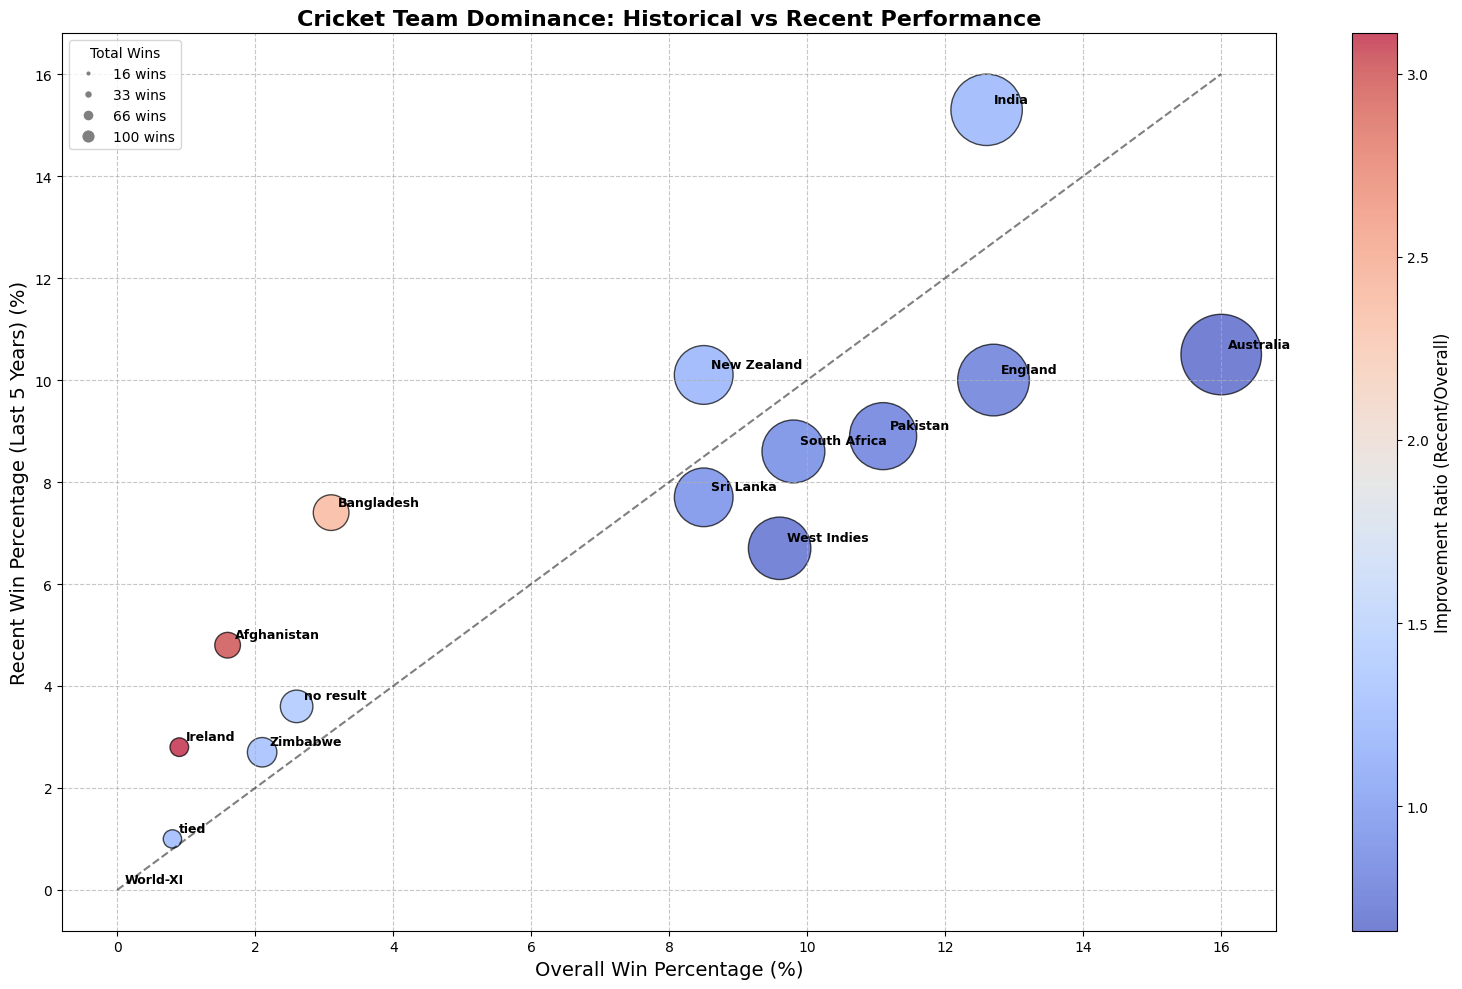

In [55]:
# Create a figure:
plt.figure(figsize=(16, 10))

# Create a scatter plot with multiple dimensions of information
scatter = plt.scatter(
    top15_teams['Win_Percentage'],  # x-axis: overall win percentage
    top15_teams['Recent_Win_Percentage'],  # y-axis: recent win percentage
    s=top15_teams['Wins'] * 3,  # size: total wins
    c=top15_teams['Improvement_Ratio'],  # color: improvement ratio
    cmap='coolwarm',  # colormap: blue for declining, red for improving
    alpha=0.7,
    edgecolors='black'
)

# Add a diagonal line representing equal performance (recent = overall)
max_val = max(top15_teams['Win_Percentage'].max(), top15_teams['Recent_Win_Percentage'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Equal Performance')

# Add team labels
for i, row in top15_teams.iterrows():
    plt.annotate(
        row['Team'], 
        (row['Win_Percentage'], row['Recent_Win_Percentage']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        fontweight='bold'
    )

# Add chart title and labels
plt.title('Cricket Team Dominance: Historical vs Recent Performance', fontsize=16, fontweight='bold')
plt.xlabel('Overall Win Percentage (%)', fontsize=14)
plt.ylabel('Recent Win Percentage (Last 5 Years) (%)', fontsize=14)

# Add a colorbar to explain the color coding
cbar = plt.colorbar(scatter)
cbar.set_label('Improvement Ratio (Recent/Overall)', fontsize=12)

# Add a legend to explain the bubble size
# Create a dummy scatter plot for the legend
sizes = [50, 100, 200, 300]
win_counts = [50/3, 100/3, 200/3, 300/3]  # Reverse the scaling for the legend
labels = [f"{int(count)} wins" for count in win_counts]

# Create legend elements
legend_elements = []
for size, label in zip(sizes, labels):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                          label=label, markerfacecolor='gray', 
                          markersize=np.sqrt(size/np.pi)))

# Add the legend
plt.legend(handles=legend_elements, title="Total Wins", loc="upper left")

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**9. Draw conclusions and provide recommendations:**

In [56]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns',
       'is_home_win', 'is_away_win'],
      dtype='object')

In [57]:
# Identify key insights from the analysis: top 3 dominant teams:
dominant_teams = team_wins.head(3)['Team'].tolist()
dominant_teams

['Australia', 'England', 'India']

In [58]:
# Top 3 rising teams:
rising_teams = potential_teams[potential_teams['Improvement_Ratio'] > 1.5].head(3)['Team'].tolist()
rising_teams

['Ireland', 'Afghanistan', 'Bangladesh']

In [59]:
# Underperforming traditional powers:
underperforming_teams = team_trends[
    (team_trends['Wins'] >= 20) & 
    (team_trends['Improvement_Ratio'] < 0.8)
]['Team'].tolist()
underperforming_teams

['Australia', 'England', 'West Indies']

In [60]:
# Calculate the concentration of wins
top3_win_percentage = team_wins.head(3)['Wins'].sum() / total_matches * 100
top5_win_percentage = team_wins.head(5)['Wins'].sum() / total_matches * 100
bottom_half_win_percentage = team_wins.iloc[len(team_wins)//2:]['Wins'].sum() / total_matches * 100

# Print conclusions
print("\nConclusions on Team Dominance:")
print(f"1. Historical Dominance: {', '.join(dominant_teams)} have been the most \n successful teams, " 
      f"collectively winning {top3_win_percentage:.1f}% of all matches.\n")
print(f"2. Concentration of Success: The top 5 teams account for {top5_win_percentage:.1f}% \n of all wins, " 
      f"while the bottom half of teams account for only {bottom_half_win_percentage:.1f}%.\n")
print(f"3. Rising Teams: {', '.join(rising_teams)} show significant improvement \n in recent years, " 
      f"with win percentages at least 1.5 times their historical average.\n")
print(f"4. Underperforming Traditional Powers: {', '.join(underperforming_teams[:3])} \n"
      f" have seen declining performance in recent years.")


Conclusions on Team Dominance:
1. Historical Dominance: Australia, England, India have been the most 
 successful teams, collectively winning 41.3% of all matches.

2. Concentration of Success: The top 5 teams account for 62.1% 
 of all wins, while the bottom half of teams account for only 19.7%.

3. Rising Teams: Ireland, Afghanistan, Bangladesh show significant improvement 
 in recent years, with win percentages at least 1.5 times their historical average.

4. Underperforming Traditional Powers: Australia, England, West Indies 
 have seen declining performance in recent years.


In [61]:
# Format-specific insights
format_dominance = format_pivot.idxmax().to_dict()
format_insights = []
for fmt, team in format_dominance.items():
    win_pct = format_pivot.loc[team, fmt]
    format_insights.append(f"{team} dominates {fmt} cricket with a {win_pct:.1f}% win rate")

print("\nFormat-specific insights:")
for insight in format_insights:
    print(f"- {insight}")


Format-specific insights:
- Australia dominates ODI  cricket with a 14.5% win rate
- India dominates T20I  cricket with a 14.5% win rate
- Australia dominates Test  cricket with a 23.4% win rate


In [62]:
# recommendations
print("\nRecommendations for Strengthening Underdogs and Grassroots Development:")
print("1. Targeted Investment: Allocate development funds to rising teams like \n" 
      f"{', '.join(rising_teams)} to capitalize on their momentum.\n")
print("2. Competitive Balance Initiatives: Implement revenue sharing and resource\n allocation models " 
      "that reduce the gap between dominant and emerging teams.\n")
print("3. Format-Specific Development: Create specialized development programs for\n formats where " 
      "teams are underperforming to build balanced capabilities.\n")
print("4. Talent Exchange Programs: Establish coaching and player exchange programs \nbetween dominant " 
      "and developing teams to transfer knowledge and skills.\n")
print("5. Grassroots Infrastructure: Invest in cricket infrastructure in regions \nwith emerging teams " 
      "to build sustainable talent pipelines.\n")
print("6. Tournament Structure Reform: Design tournament structures that provide more \ncompetitive " 
      "opportunities for developing teams while maintaining elite competition.\n")
print("7. Performance Monitoring System: Implement a comprehensive performance \ntracking system to " 
      "identify early signs of improvement in \ndeveloping teams and provide timely support.\n")


Recommendations for Strengthening Underdogs and Grassroots Development:
1. Targeted Investment: Allocate development funds to rising teams like 
Ireland, Afghanistan, Bangladesh to capitalize on their momentum.

2. Competitive Balance Initiatives: Implement revenue sharing and resource
 allocation models that reduce the gap between dominant and emerging teams.

3. Format-Specific Development: Create specialized development programs for
 formats where teams are underperforming to build balanced capabilities.

4. Talent Exchange Programs: Establish coaching and player exchange programs 
between dominant and developing teams to transfer knowledge and skills.

5. Grassroots Infrastructure: Invest in cricket infrastructure in regions 
with emerging teams to build sustainable talent pipelines.

6. Tournament Structure Reform: Design tournament structures that provide more 
competitive opportunities for developing teams while maintaining elite competition.

7. Performance Monitoring System: 

----

## 8. **Head-to-Head Results:**

Let's analyze the `head-to-head results` between cricket teams to identify `key rivalries` and `patterns of dominance`.

**1. Prepare the data for head-to-head analysis:**

First, standardize the team matchups regardless of which team is listed as `team_1` or `team_2`.

In [63]:
data.head()

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,...,5,2007,Nov,India,False,6.0,0.0,False,True,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,...,4,2006,Jan,Pakistan,False,0.0,341.0,False,True,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,5,2005,Mar,India,False,0.0,168.0,False,False,True
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,...,5,2005,Mar,India,False,0.0,195.0,False,True,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,...,4,2004,Apr,Pakistan,False,0.0,131.0,False,False,True


In [64]:
# Create a standardized representation of matchups
# This ensures team1 vs team2 and team2 vs team1 are treated as the same matchup
h2h_data = data.copy()

# Create columns to standardize the matchup representation
h2h_data['team_A'] = h2h_data.apply(lambda x: min(x['team_1'], x['team_2']), axis=1)
h2h_data['team_B'] = h2h_data.apply(lambda x: max(x['team_1'], x['team_2']), axis=1)
h2h_data.head(10)

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win,team_A,team_B
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,...,Nov,India,False,6.0,0.0,False,True,False,India,Pakistan
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,...,Jan,Pakistan,False,0.0,341.0,False,True,False,India,Pakistan
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,Mar,India,False,0.0,168.0,False,False,True,India,Pakistan
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,...,Mar,India,False,0.0,195.0,False,True,False,India,Pakistan
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,...,Apr,Pakistan,False,0.0,131.0,False,False,True,India,Pakistan
10,Pakistan,India,Pakistan,9 wickets,Lahore,Test,1695,0,0,2004-04-05,...,Apr,Pakistan,False,9.0,0.0,False,True,False,India,Pakistan
11,Pakistan,India,India,inns & 52 runs,Multan,Test,1693,0,0,2004-03-28,...,Mar,Pakistan,False,0.0,52.0,False,False,True,India,Pakistan
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test,1444,0,0,1999-02-16,...,Feb,India,False,0.0,46.0,False,False,True,India,Pakistan
13,India,Pakistan,India,212 runs,Delhi,Test,1443,0,0,1999-02-04,...,Feb,India,False,0.0,212.0,False,True,False,India,Pakistan
14,India,Pakistan,Pakistan,12 runs,Chennai,Test,1442,0,0,1999-01-28,...,Jan,India,False,0.0,12.0,False,False,True,India,Pakistan


Here, 
- `min()` picks the lexicographically earlier name (alphabetically smaller) → stored in `team_A`

- `max()` picks the lexicographically later name → stored in `team_B`  

So, regardless of how the teams were originally ordered (`team_1` vs `team_2`), `team_A` and `team_B` always follow the same standardized ordering.

In [65]:
# Example: How above thing works:
min(["Aus", "Ind"]), max(["Ireland", "India"])

('Aus', 'Ireland')

In [66]:
# Create a column to identify which team won (A, B, or neither)
h2h_data['winner_AB'] = 'draw/no result' # Initializes a new column called 'winner_AB' with the default value 'draw/no result'

h2h_data.loc[h2h_data['winner'] == h2h_data['team_A'], 'winner_AB'] = 'A' # For rows where the actual winner matches team_A, it sets 'winner_AB' to 'A'
h2h_data.loc[h2h_data['winner'] == h2h_data['team_B'], 'winner_AB'] = 'B' # For rows where the actual winner matches team_B, it sets 'winner_AB' to 'B'

In [67]:
# Display the first few rows to verify our data preparation
print("Sample of prepared head-to-head data:")
print(h2h_data[['team_A', 'team_B', 'winner', 'winner_AB']].head())

Sample of prepared head-to-head data:
  team_A    team_B    winner winner_AB
2  India  Pakistan     India         A
3  India  Pakistan  Pakistan         B
6  India  Pakistan  Pakistan         B
7  India  Pakistan     India         A
9  India  Pakistan     India         A


In [68]:
h2h_data

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win,team_A,team_B,winner_AB
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,...,India,False,6.0,0.0,False,True,False,India,Pakistan,A
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,...,Pakistan,False,0.0,341.0,False,True,False,India,Pakistan,B
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,India,False,0.0,168.0,False,False,True,India,Pakistan,B
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,...,India,False,0.0,195.0,False,True,False,India,Pakistan,A
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,...,Pakistan,False,0.0,131.0,False,False,True,India,Pakistan,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,Australia,ICC World XI,Australia,210 runs,Sydney,Test,1768,0,0,2005-10-14,...,Australia,False,0.0,210.0,False,True,False,Australia,ICC World XI,A
7789,Australia,ICC World XI,Australia,156 runs,Melbourne (Docklands),ODI,0,2284,0,2005-10-09,...,Australia,False,0.0,156.0,False,True,False,Australia,ICC World XI,A
7790,Australia,ICC World XI,Australia,55 runs,Melbourne (Docklands),ODI,0,2283,0,2005-10-07,...,Australia,False,0.0,55.0,False,True,False,Australia,ICC World XI,A
7791,Australia,ICC World XI,Australia,93 runs,Melbourne (Docklands),ODI,0,2282,0,2005-10-05,...,Australia,False,0.0,93.0,False,True,False,Australia,ICC World XI,A


**2. Count matches and wins for each team pair:**

Now, let's count the total matches and wins for each team pair to understand the rivalry dynamics.

In [69]:
# Group by team pair and count total matches
matchup_counts = h2h_data.groupby(['team_A', 'team_B']).size().reset_index(name='total_matches')
matchup_counts

,team_A,team_B,total_matches
0,Afghanistan,Australia,7
1,Afghanistan,Bangladesh,33
2,Afghanistan,England,7
3,Afghanistan,India,14
4,Afghanistan,Ireland,60
...,...,...,...
64,South Africa,West Indies,116
65,South Africa,Zimbabwe,55
66,Sri Lanka,West Indies,100
67,Sri Lanka,Zimbabwe,84


In [70]:
# Count wins for team A
team_a_wins = h2h_data[h2h_data['winner_AB'] == 'A'].groupby(['team_A', 'team_B']).size().reset_index(name='team_A_wins')
team_a_wins

,team_A,team_B,team_A_wins
0,Afghanistan,Australia,1
1,Afghanistan,Bangladesh,16
2,Afghanistan,England,2
3,Afghanistan,Ireland,37
4,Afghanistan,New Zealand,1
...,...,...,...
60,South Africa,West Indies,80
61,South Africa,Zimbabwe,51
62,Sri Lanka,West Indies,53
63,Sri Lanka,Zimbabwe,68


In [71]:
# Count wins for team B
team_b_wins = h2h_data[h2h_data['winner_AB'] == 'B'].groupby(['team_A', 'team_B']).size().reset_index(name='team_B_wins')
team_b_wins

,team_A,team_B,team_B_wins
0,Afghanistan,Australia,5
1,Afghanistan,Bangladesh,17
2,Afghanistan,England,5
3,Afghanistan,India,11
4,Afghanistan,Ireland,21
...,...,...,...
61,South Africa,West Indies,33
62,South Africa,Zimbabwe,2
63,Sri Lanka,West Indies,44
64,Sri Lanka,Zimbabwe,13


In [72]:
# Merge the dataframes
h2h_stats = pd.merge(matchup_counts, team_a_wins, on=['team_A', 'team_B'], how='left')
h2h_stats = pd.merge(h2h_stats, team_b_wins, on=['team_A', 'team_B'], how='left')
h2h_stats

,team_A,team_B,total_matches,team_A_wins,team_B_wins
0,Afghanistan,Australia,7,1.0,5.0
1,Afghanistan,Bangladesh,33,16.0,17.0
2,Afghanistan,England,7,2.0,5.0
3,Afghanistan,India,14,NaN,11.0
4,Afghanistan,Ireland,60,37.0,21.0
...,...,...,...,...,...
64,South Africa,West Indies,116,80.0,33.0
65,South Africa,Zimbabwe,55,51.0,2.0
66,Sri Lanka,West Indies,100,53.0,44.0
67,Sri Lanka,Zimbabwe,84,68.0,13.0


In [73]:
# Fill NaN values with 0 (teams that haven't won against each other)
h2h_stats['team_A_wins'] = h2h_stats['team_A_wins'].fillna(0)
h2h_stats['team_B_wins'] = h2h_stats['team_B_wins'].fillna(0)
h2h_stats

,team_A,team_B,total_matches,team_A_wins,team_B_wins
0,Afghanistan,Australia,7,1.0,5.0
1,Afghanistan,Bangladesh,33,16.0,17.0
2,Afghanistan,England,7,2.0,5.0
3,Afghanistan,India,14,0.0,11.0
4,Afghanistan,Ireland,60,37.0,21.0
...,...,...,...,...,...
64,South Africa,West Indies,116,80.0,33.0
65,South Africa,Zimbabwe,55,51.0,2.0
66,Sri Lanka,West Indies,100,53.0,44.0
67,Sri Lanka,Zimbabwe,84,68.0,13.0


In [74]:
# Calculate draws/no results
h2h_stats['draws_no_results'] = h2h_stats['total_matches'] - h2h_stats['team_A_wins'] - h2h_stats['team_B_wins']

# Calculate win percentages
h2h_stats['team_A_win_pct'] = (h2h_stats['team_A_wins'] / h2h_stats['total_matches'] * 100).round(1)
h2h_stats['team_B_win_pct'] = (h2h_stats['team_B_wins'] / h2h_stats['total_matches'] * 100).round(1)

# Calculate dominance ratio (max win % / min win %)
h2h_stats['max_win_pct'] = h2h_stats[['team_A_win_pct', 'team_B_win_pct']].max(axis=1)
h2h_stats['min_win_pct'] = h2h_stats[['team_A_win_pct', 'team_B_win_pct']].min(axis=1)
h2h_stats['dominance_ratio'] = h2h_stats.apply(
    lambda x: x['max_win_pct'] / x['min_win_pct'] if x['min_win_pct'] > 0 else x['max_win_pct'], axis=1
).round(2)

# Display the head-to-head statistics
print("\nHead-to-Head Statistics:")
print(h2h_stats.sort_values('total_matches', ascending=False).head(10))


Head-to-Head Statistics:
         team_A        team_B  total_matches  team_A_wins  team_B_wins  \
12    Australia       England            452        256.0        189.0   
14    Australia         India            266        143.0        111.0   
20    Australia   West Indies            263        151.0        105.0   
37      England   West Indies            256        124.0        125.0   
44        India     Sri Lanka            232        142.0         75.0   
31      England         India            225        107.0        113.0   
45        India   West Indies            225        114.0        104.0   
59     Pakistan     Sri Lanka            220        129.0         86.0   
18    Australia  South Africa            215        122.0         89.0   
53  New Zealand      Pakistan            210         94.0        110.0   

    draws_no_results  team_A_win_pct  team_B_win_pct  max_win_pct  \
12               7.0            56.6            41.8         56.6   
14              12.0 

**3.  Identify the most frequent matchups (biggest rivalries):**

Let's identify the most `frequent matchups`, which represent the `biggest rivalries` in cricket.

In [75]:
# Sort by total matches to find the most frequent matchups
top_matchups = h2h_stats.sort_values('total_matches', ascending=False).head(15).copy()
top_matchups

,team_A,team_B,total_matches,team_A_wins,team_B_wins,draws_no_results,team_A_win_pct,team_B_win_pct,max_win_pct,min_win_pct,dominance_ratio
12,Australia,England,452,256.0,189.0,7.0,56.6,41.8,56.6,41.8,1.35
14,Australia,India,266,143.0,111.0,12.0,53.8,41.7,53.8,41.7,1.29
20,Australia,West Indies,263,151.0,105.0,7.0,57.4,39.9,57.4,39.9,1.44
37,England,West Indies,256,124.0,125.0,7.0,48.4,48.8,48.8,48.4,1.01
44,India,Sri Lanka,232,142.0,75.0,15.0,61.2,32.3,61.2,32.3,1.89
31,England,India,225,107.0,113.0,5.0,47.6,50.2,50.2,47.6,1.05
45,India,West Indies,225,114.0,104.0,7.0,50.7,46.2,50.7,46.2,1.10
59,Pakistan,Sri Lanka,220,129.0,86.0,5.0,58.6,39.1,58.6,39.1,1.50
18,Australia,South Africa,215,122.0,89.0,4.0,56.7,41.4,56.7,41.4,1.37
53,New Zealand,Pakistan,210,94.0,110.0,6.0,44.8,52.4,52.4,44.8,1.17


In [76]:
# Create a more readable representation of the matchups
top_matchups['matchup'] = top_matchups['team_A'] + ' vs ' + top_matchups['team_B']
top_matchups['win_distribution'] = top_matchups.apply(
    lambda x: f"{int(x['team_A_wins'])}-{int(x['draws_no_results'])}-{int(x['team_B_wins'])}", axis=1
)

# Display the top matchups
print("\nTop 15 Cricket Rivalries by Number of Matches:")
print(top_matchups[['matchup', 'total_matches', 'win_distribution', 'dominance_ratio']])


Top 15 Cricket Rivalries by Number of Matches:
                      matchup  total_matches win_distribution  dominance_ratio
12       Australia vs England            452        256-7-189             1.35
14         Australia vs India            266       143-12-111             1.29
20   Australia vs West Indies            263        151-7-105             1.44
37     England vs West Indies            256        124-7-125             1.01
44         India vs Sri Lanka            232        142-15-75             1.89
31           England vs India            225        107-5-113             1.05
45       India vs West Indies            225        114-7-104             1.10
59      Pakistan vs Sri Lanka            220         129-5-86             1.50
18  Australia vs South Africa            215         122-4-89             1.37
53    New Zealand vs Pakistan            210         94-6-110             1.17
16   Australia vs New Zealand            205         145-8-52             2.78
60  

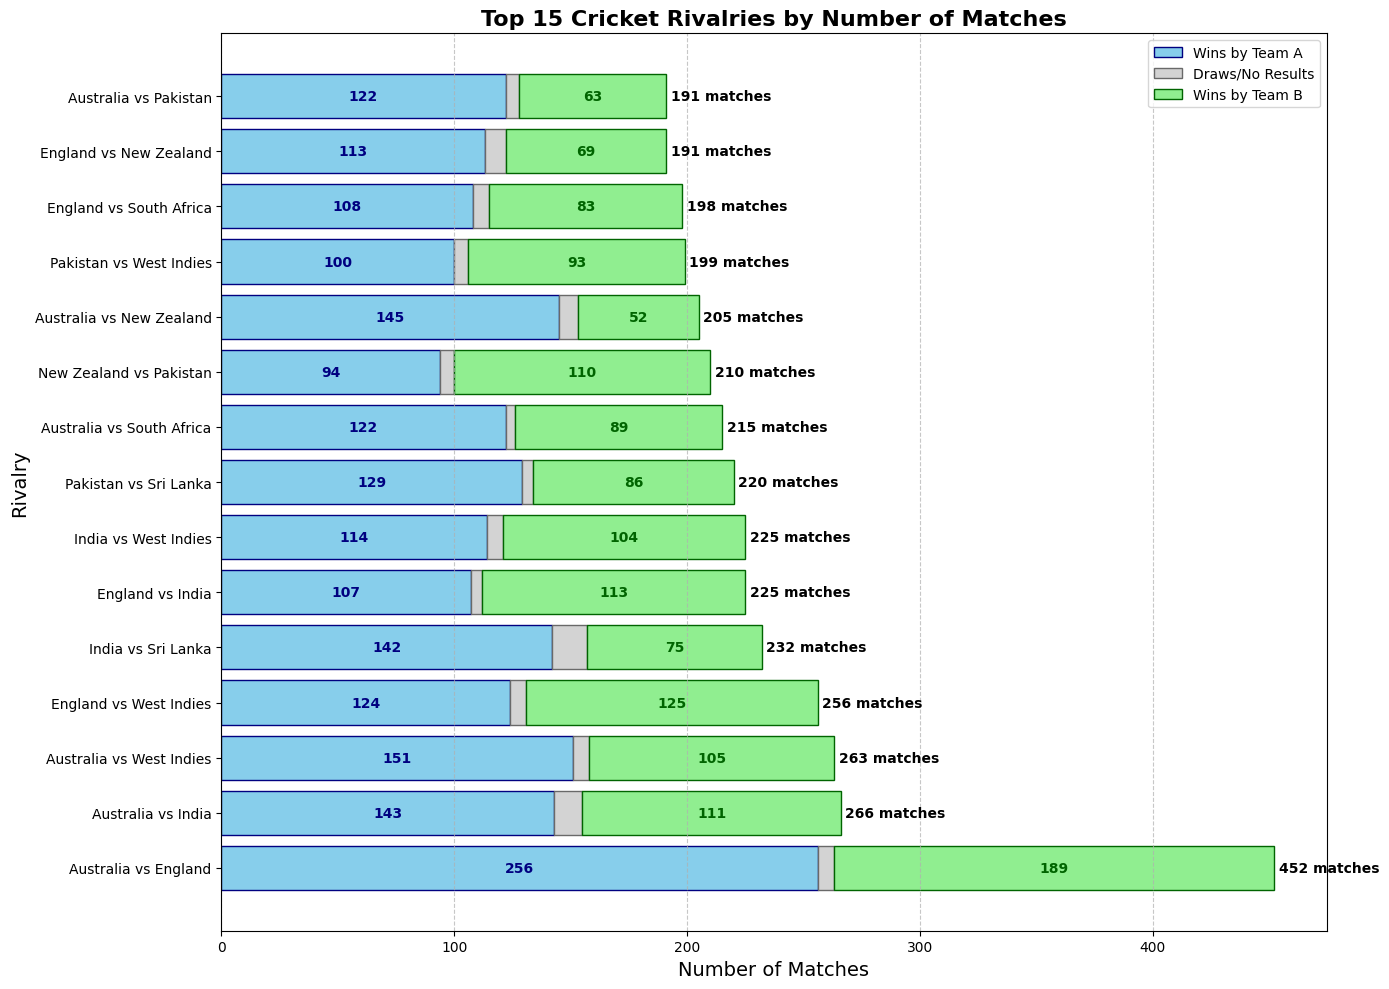

In [77]:
# Create a bar chart to visualize the top rivalries
plt.figure(figsize=(14, 10))

# Create stacked bars for wins and draws
bars = plt.barh(
    top_matchups['matchup'], 
    top_matchups['team_A_wins'], 
    color='skyblue', 
    edgecolor='navy',
    label=f'Wins by Team A'
)

plt.barh(
    top_matchups['matchup'], 
    top_matchups['draws_no_results'], 
    left=top_matchups['team_A_wins'],
    color='lightgray', 
    edgecolor='dimgray',
    label='Draws/No Results'
)

plt.barh(
    top_matchups['matchup'], 
    top_matchups['team_B_wins'], 
    left=top_matchups['team_A_wins'] + top_matchups['draws_no_results'],
    color='lightgreen', 
    edgecolor='darkgreen',
    label=f'Wins by Team B'
)

# Add match count labels at the end of each bar
for i, (_, row) in enumerate(top_matchups.iterrows()):
    plt.text(
        row['total_matches'] + 2, 
        i, 
        f"{int(row['total_matches'])} matches",
        va='center',
        fontweight='bold'
    )

# Add win distribution labels inside each bar
for i, (_, row) in enumerate(top_matchups.iterrows()):
    # Only add text if there's enough space
    if row['team_A_wins'] > 10:
        plt.text(
            row['team_A_wins'] / 2, 
            i, 
            f"{int(row['team_A_wins'])}",
            ha='center',
            va='center',
            fontweight='bold',
            color='navy'
        )
    
    if row['team_B_wins'] > 10:
        plt.text(
            row['team_A_wins'] + row['draws_no_results'] + row['team_B_wins'] / 2, 
            i, 
            f"{int(row['team_B_wins'])}",
            ha='center',
            va='center',
            fontweight='bold',
            color='darkgreen'
        )

# Add chart title and labels
plt.title('Top 15 Cricket Rivalries by Number of Matches', fontsize=16, fontweight='bold')
plt.xlabel('Number of Matches', fontsize=14)
plt.ylabel('Rivalry', fontsize=14)

# Add a legend
plt.legend(loc='upper right')

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**4.  Head-to-head matrix for top teams:**

Let's create a matrix visualization to show the head-to-head records between top 10 cricket teams.

In [78]:
# Identify top teams based on total matches played
team_matches = pd.concat([
    h2h_stats['team_A'].value_counts(),
    h2h_stats['team_B'].value_counts()
], axis=1).fillna(0)
team_matches.columns = ['as_team_A', 'as_team_B']
team_matches['total'] = team_matches['as_team_A'] + team_matches['as_team_B']
top_teams = team_matches.sort_values('total', ascending=False).head(10).index.tolist()

# Filter head-to-head data for top teams
top_team_h2h = h2h_data[
    (h2h_data['team_A'].isin(top_teams)) & 
    (h2h_data['team_B'].isin(top_teams))
].copy()

# Create a matrix of win percentages
# First, create a dataframe with all possible team combinations
all_combinations = []
for team_a in top_teams:
    for team_b in top_teams:
        if team_a != team_b:
            if team_a < team_b:
                all_combinations.append((team_a, team_b))
            else:
                all_combinations.append((team_b, team_a))

all_pairs = pd.DataFrame(all_combinations, columns=['team_A', 'team_B']).drop_duplicates()

# Merge with actual head-to-head data
matrix_data = pd.merge(
    all_pairs, 
    h2h_stats[['team_A', 'team_B', 'team_A_wins', 'team_B_wins', 'total_matches']], 
    on=['team_A', 'team_B'], 
    how='left'
).fillna(0)

# Create a matrix for team A win percentage
win_matrix = np.zeros((len(top_teams), len(top_teams)))
for _, row in matrix_data.iterrows():
    if row['total_matches'] > 0:
        i = top_teams.index(row['team_A'])
        j = top_teams.index(row['team_B'])
        win_matrix[i, j] = row['team_A_wins'] / row['total_matches'] * 100
        win_matrix[j, i] = row['team_B_wins'] / row['total_matches'] * 100

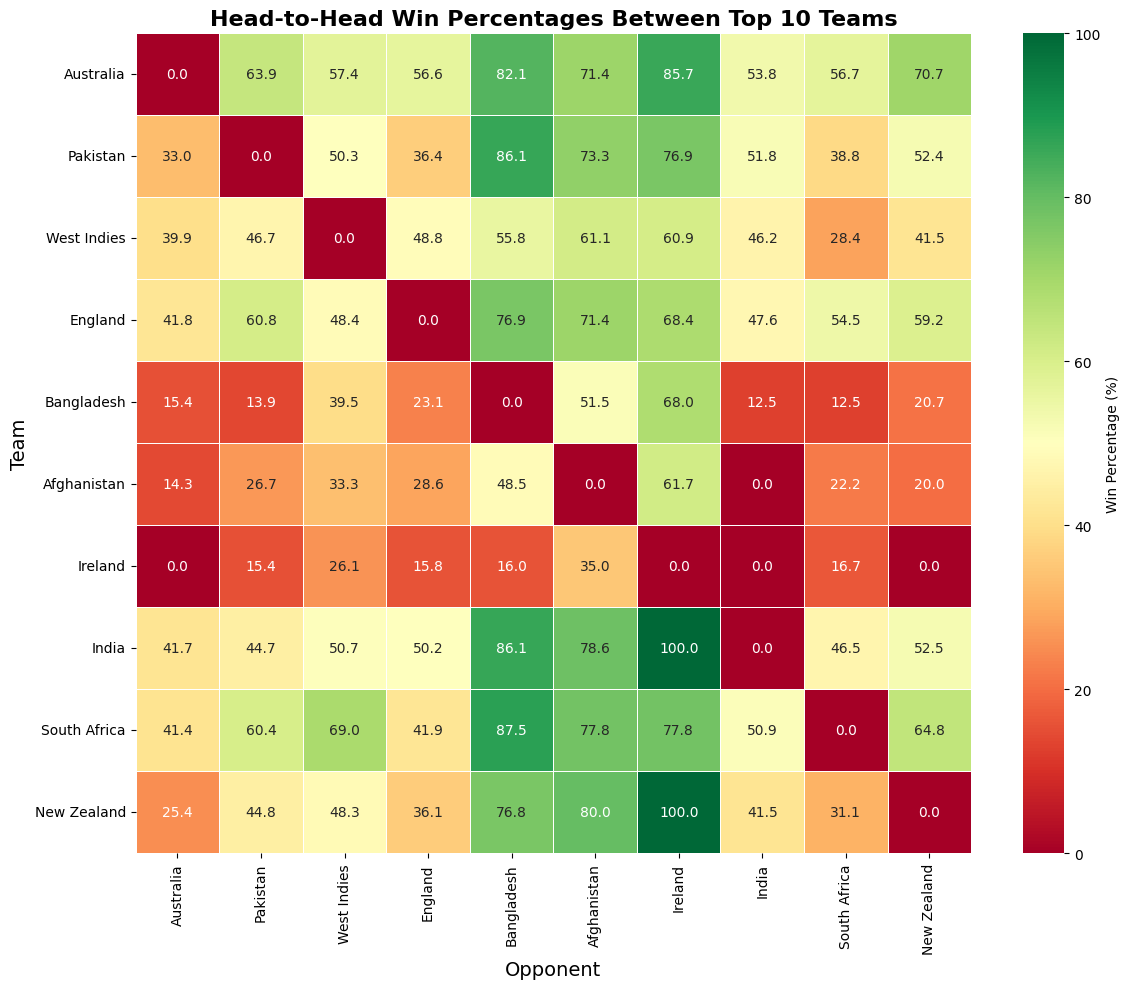

In [79]:
# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    win_matrix,
    annot=True,
    fmt='.1f',
    cmap='RdYlGn',
    xticklabels=top_teams,
    yticklabels=top_teams,
    linewidths=0.5,
    cbar_kws={'label': 'Win Percentage (%)'}
)

# Add chart title and labels
plt.title('Head-to-Head Win Percentages Between Top 10 Teams', fontsize=16, fontweight='bold')
plt.xlabel('Opponent', fontsize=14)
plt.ylabel('Team', fontsize=14)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

# Create a matrix for total matches played
matches_matrix = np.zeros((len(top_teams), len(top_teams)))
for _, row in matrix_data.iterrows():
    i = top_teams.index(row['team_A'])
    j = top_teams.index(row['team_B'])
    matches_matrix[i, j] = row['total_matches']
    matches_matrix[j, i] = row['total_matches']

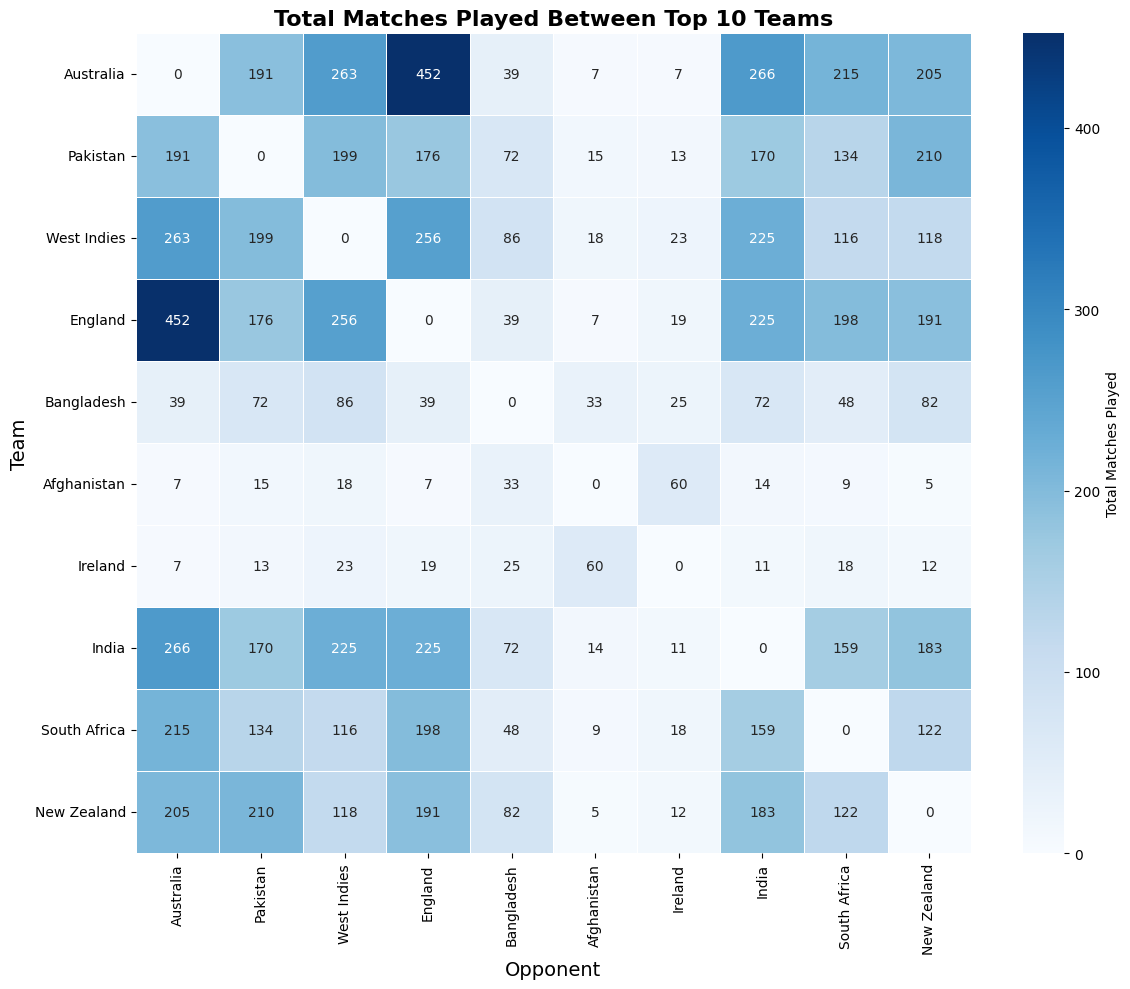

In [80]:
# Create the heatmap for total matches
plt.figure(figsize=(12, 10))
sns.heatmap(
    matches_matrix,
    annot=True,
    fmt='.0f',
    cmap='Blues',
    xticklabels=top_teams,
    yticklabels=top_teams,
    linewidths=0.5,
    cbar_kws={'label': 'Total Matches Played'}
)

# Add chart title and labels
plt.title('Total Matches Played Between Top 10 Teams', fontsize=16, fontweight='bold')
plt.xlabel('Opponent', fontsize=14)
plt.ylabel('Team', fontsize=14)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**5. Analysis on Rivalry Intensity and Competitiveness:**

Now; analyze the intensity and competitiveness of the top rivalries to identify the most marketable matchups.

In [81]:
# Calculate competitiveness metrics for each rivalry
h2h_stats['competitiveness'] = 1 - abs(h2h_stats['team_A_win_pct'] - h2h_stats['team_B_win_pct']) / 100
h2h_stats['intensity'] = h2h_stats['total_matches'] * h2h_stats['competitiveness']
h2h_stats

,team_A,team_B,total_matches,team_A_wins,team_B_wins,draws_no_results,team_A_win_pct,team_B_win_pct,max_win_pct,min_win_pct,dominance_ratio,competitiveness,intensity
0,Afghanistan,Australia,7,1.0,5.0,1.0,14.3,71.4,71.4,14.3,4.99,0.429,3.003
1,Afghanistan,Bangladesh,33,16.0,17.0,0.0,48.5,51.5,51.5,48.5,1.06,0.970,32.010
2,Afghanistan,England,7,2.0,5.0,0.0,28.6,71.4,71.4,28.6,2.50,0.572,4.004
3,Afghanistan,India,14,0.0,11.0,3.0,0.0,78.6,78.6,0.0,78.60,0.214,2.996
4,Afghanistan,Ireland,60,37.0,21.0,2.0,61.7,35.0,61.7,35.0,1.76,0.733,43.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,South Africa,West Indies,116,80.0,33.0,3.0,69.0,28.4,69.0,28.4,2.43,0.594,68.904
65,South Africa,Zimbabwe,55,51.0,2.0,2.0,92.7,3.6,92.7,3.6,25.75,0.109,5.995
66,Sri Lanka,West Indies,100,53.0,44.0,3.0,53.0,44.0,53.0,44.0,1.20,0.910,91.000
67,Sri Lanka,Zimbabwe,84,68.0,13.0,3.0,81.0,15.5,81.0,15.5,5.23,0.345,28.980


In [82]:
# Filter for rivalries with at least 10 matches
significant_rivalries = h2h_stats[h2h_stats['total_matches'] >= 10].copy()
significant_rivalries

,team_A,team_B,total_matches,team_A_wins,team_B_wins,draws_no_results,team_A_win_pct,team_B_win_pct,max_win_pct,min_win_pct,dominance_ratio,competitiveness,intensity
1,Afghanistan,Bangladesh,33,16.0,17.0,0.0,48.5,51.5,51.5,48.5,1.06,0.970,32.010
3,Afghanistan,India,14,0.0,11.0,3.0,0.0,78.6,78.6,0.0,78.60,0.214,2.996
4,Afghanistan,Ireland,60,37.0,21.0,2.0,61.7,35.0,61.7,35.0,1.76,0.733,43.980
6,Afghanistan,Pakistan,15,4.0,11.0,0.0,26.7,73.3,73.3,26.7,2.75,0.534,8.010
8,Afghanistan,Sri Lanka,24,7.0,16.0,1.0,29.2,66.7,66.7,29.2,2.28,0.625,15.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,South Africa,West Indies,116,80.0,33.0,3.0,69.0,28.4,69.0,28.4,2.43,0.594,68.904
65,South Africa,Zimbabwe,55,51.0,2.0,2.0,92.7,3.6,92.7,3.6,25.75,0.109,5.995
66,Sri Lanka,West Indies,100,53.0,44.0,3.0,53.0,44.0,53.0,44.0,1.20,0.910,91.000
67,Sri Lanka,Zimbabwe,84,68.0,13.0,3.0,81.0,15.5,81.0,15.5,5.23,0.345,28.980


In [83]:
# Sort by intensity to find the most intense rivalries
top_intense_rivalries = significant_rivalries.sort_values('intensity', ascending=False).head(15)
top_intense_rivalries['matchup'] = top_intense_rivalries['team_A'] + ' vs ' + top_intense_rivalries['team_B']
top_intense_rivalries

,team_A,team_B,total_matches,team_A_wins,team_B_wins,draws_no_results,team_A_win_pct,team_B_win_pct,max_win_pct,min_win_pct,dominance_ratio,competitiveness,intensity,matchup
12,Australia,England,452,256.0,189.0,7.0,56.6,41.8,56.6,41.8,1.35,0.852,385.104,Australia vs England
37,England,West Indies,256,124.0,125.0,7.0,48.4,48.8,48.8,48.4,1.01,0.996,254.976,England vs West Indies
14,Australia,India,266,143.0,111.0,12.0,53.8,41.7,53.8,41.7,1.29,0.879,233.814,Australia vs India
31,England,India,225,107.0,113.0,5.0,47.6,50.2,50.2,47.6,1.05,0.974,219.150,England vs India
20,Australia,West Indies,263,151.0,105.0,7.0,57.4,39.9,57.4,39.9,1.44,0.825,216.975,Australia vs West Indies
45,India,West Indies,225,114.0,104.0,7.0,50.7,46.2,50.7,46.2,1.10,0.955,214.875,India vs West Indies
53,New Zealand,Pakistan,210,94.0,110.0,6.0,44.8,52.4,52.4,44.8,1.17,0.924,194.040,New Zealand vs Pakistan
60,Pakistan,West Indies,199,100.0,93.0,6.0,50.3,46.7,50.3,46.7,1.08,0.964,191.836,Pakistan vs West Indies
18,Australia,South Africa,215,122.0,89.0,4.0,56.7,41.4,56.7,41.4,1.37,0.847,182.105,Australia vs South Africa
59,Pakistan,Sri Lanka,220,129.0,86.0,5.0,58.6,39.1,58.6,39.1,1.50,0.805,177.100,Pakistan vs Sri Lanka


In [86]:
# Display the most intense rivalries
print("\nTop 15 Most Intense Cricket Rivalries:")
top_intense_rivalries[['matchup', 'total_matches', 'team_A_win_pct', 'team_B_win_pct', 'competitiveness', 'intensity']]



Top 15 Most Intense Cricket Rivalries:


,matchup,total_matches,team_A_win_pct,team_B_win_pct,competitiveness,intensity
12,Australia vs England,452,56.6,41.8,0.852,385.104
37,England vs West Indies,256,48.4,48.8,0.996,254.976
14,Australia vs India,266,53.8,41.7,0.879,233.814
31,England vs India,225,47.6,50.2,0.974,219.150
20,Australia vs West Indies,263,57.4,39.9,0.825,216.975
45,India vs West Indies,225,50.7,46.2,0.955,214.875
53,New Zealand vs Pakistan,210,44.8,52.4,0.924,194.040
60,Pakistan vs West Indies,199,50.3,46.7,0.964,191.836
18,Australia vs South Africa,215,56.7,41.4,0.847,182.105
59,Pakistan vs Sri Lanka,220,58.6,39.1,0.805,177.100


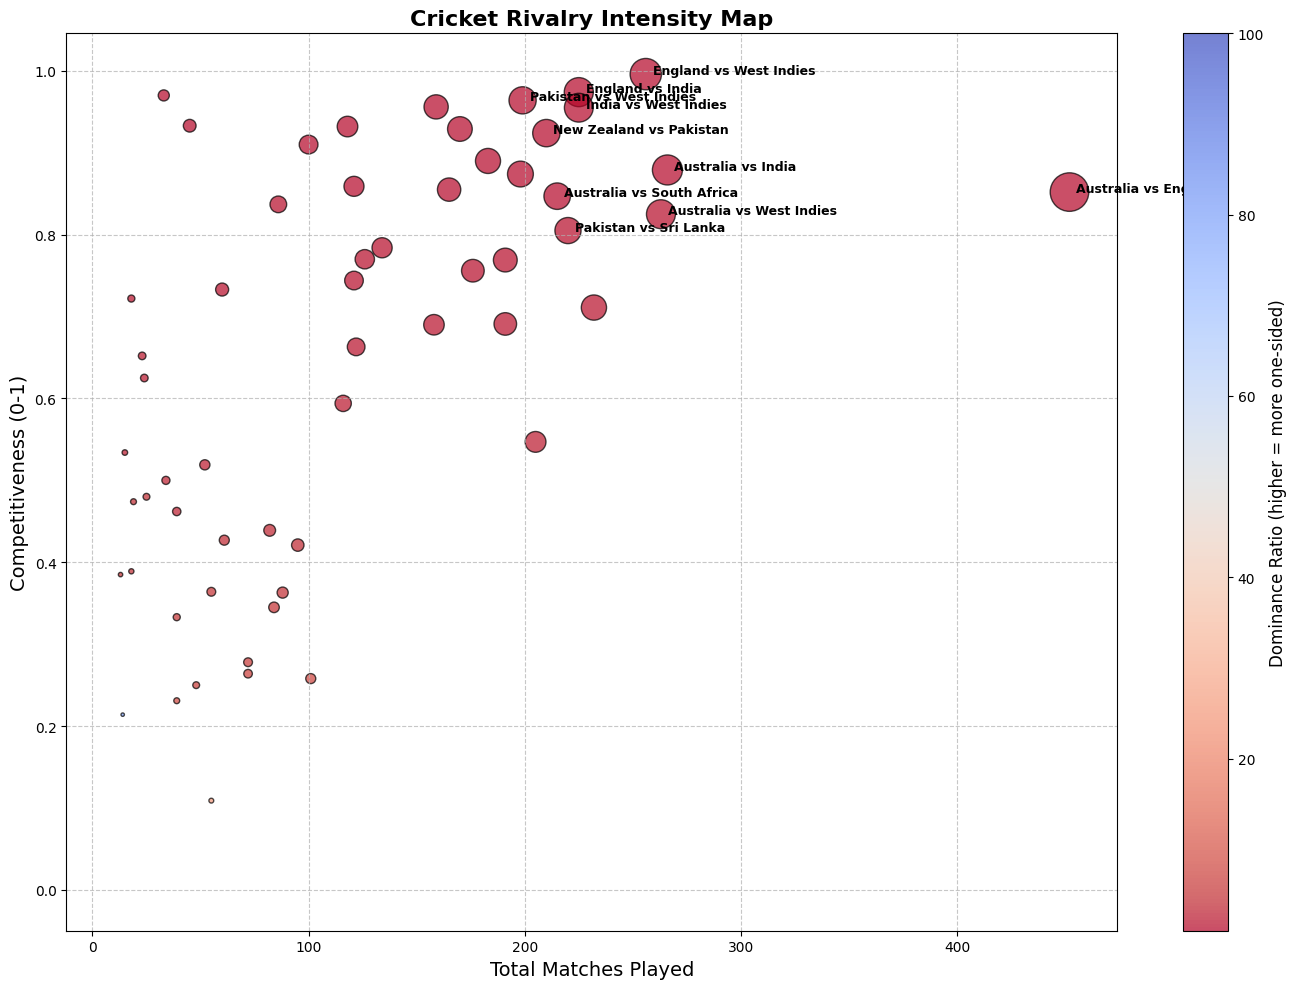

In [85]:
# Create a scatter plot to visualize rivalry intensity
plt.figure(figsize=(14, 10))

# Create the scatter plot
scatter = plt.scatter(
    significant_rivalries['total_matches'],
    significant_rivalries['competitiveness'],
    s=significant_rivalries['intensity'] * 2,  # Size proportional to intensity
    c=significant_rivalries['dominance_ratio'],  # Color by dominance ratio
    cmap='coolwarm_r',  # Reversed colormap: blue for balanced, red for one-sided
    alpha=0.7,
    edgecolors='black'
)

# Add labels for top intense rivalries
for _, row in top_intense_rivalries.head(10).iterrows():
    plt.annotate(
        f"{row['team_A']} vs {row['team_B']}",
        (row['total_matches'], row['competitiveness']),
        xytext=(5, 0),
        textcoords='offset points',
        fontsize=9,
        fontweight='bold'
    )

# Add chart title and labels
plt.title('Cricket Rivalry Intensity Map', fontsize=16, fontweight='bold')
plt.xlabel('Total Matches Played', fontsize=14)
plt.ylabel('Competitiveness (0-1)', fontsize=14)

# Add a colorbar to explain the color coding
cbar = plt.colorbar(scatter)
cbar.set_label('Dominance Ratio (higher = more one-sided)', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**6. Format-specific rivalries:**

Let's see how rivalries differ across different formats of cricket:

In [88]:
# Group by team pair and format
format_h2h = h2h_data.groupby(['team_A', 'team_B', 'format']).size().reset_index(name='format_matches')
format_h2h

,team_A,team_B,format,format_matches
0,Afghanistan,Australia,ODI,5
1,Afghanistan,Australia,T20I,2
2,Afghanistan,Bangladesh,ODI,19
3,Afghanistan,Bangladesh,T20I,12
4,Afghanistan,Bangladesh,Test,2
...,...,...,...,...
187,Sri Lanka,Zimbabwe,T20I,6
188,Sri Lanka,Zimbabwe,Test,14
189,West Indies,Zimbabwe,ODI,49
190,West Indies,Zimbabwe,T20I,4


In [89]:
# Get wins by format for team A
format_a_wins = h2h_data[h2h_data['winner_AB'] == 'A'].groupby(['team_A', 'team_B', 'format']).size().reset_index(name='team_A_format_wins')
format_a_wins

,team_A,team_B,format,team_A_format_wins
0,Afghanistan,Australia,T20I,1
1,Afghanistan,Bangladesh,ODI,8
2,Afghanistan,Bangladesh,T20I,7
3,Afghanistan,Bangladesh,Test,1
4,Afghanistan,England,ODI,2
...,...,...,...,...
167,Sri Lanka,Zimbabwe,T20I,5
168,Sri Lanka,Zimbabwe,Test,14
169,West Indies,Zimbabwe,ODI,36
170,West Indies,Zimbabwe,T20I,3


In [90]:
# Get wins by format for team B
format_b_wins = h2h_data[h2h_data['winner_AB'] == 'B'].groupby(['team_A', 'team_B', 'format']).size().reset_index(name='team_B_format_wins')
format_b_wins

,team_A,team_B,format,team_B_format_wins
0,Afghanistan,Australia,ODI,4
1,Afghanistan,Australia,T20I,1
2,Afghanistan,Bangladesh,ODI,11
3,Afghanistan,Bangladesh,T20I,5
4,Afghanistan,Bangladesh,Test,1
...,...,...,...,...
169,Sri Lanka,West Indies,Test,4
170,Sri Lanka,Zimbabwe,ODI,12
171,Sri Lanka,Zimbabwe,T20I,1
172,West Indies,Zimbabwe,ODI,11


In [91]:
# Merge the dataframes
format_stats = pd.merge(format_h2h, format_a_wins, on=['team_A', 'team_B', 'format'], how='left')
format_stats = pd.merge(format_stats, format_b_wins, on=['team_A', 'team_B', 'format'], how='left')

# Fill NaN values with 0
format_stats['team_A_format_wins'] = format_stats['team_A_format_wins'].fillna(0)
format_stats['team_B_format_wins'] = format_stats['team_B_format_wins'].fillna(0)

In [92]:
# Calculate win percentages
format_stats['team_A_format_win_pct'] = (format_stats['team_A_format_wins'] / format_stats['format_matches'] * 100).round(1)
format_stats['team_B_format_win_pct'] = (format_stats['team_B_format_wins'] / format_stats['format_matches'] * 100).round(1)
format_stats

,team_A,team_B,format,format_matches,team_A_format_wins,team_B_format_wins,team_A_format_win_pct,team_B_format_win_pct
0,Afghanistan,Australia,ODI,5,0.0,4.0,0.0,80.0
1,Afghanistan,Australia,T20I,2,1.0,1.0,50.0,50.0
2,Afghanistan,Bangladesh,ODI,19,8.0,11.0,42.1,57.9
3,Afghanistan,Bangladesh,T20I,12,7.0,5.0,58.3,41.7
4,Afghanistan,Bangladesh,Test,2,1.0,1.0,50.0,50.0
...,...,...,...,...,...,...,...,...
187,Sri Lanka,Zimbabwe,T20I,6,5.0,1.0,83.3,16.7
188,Sri Lanka,Zimbabwe,Test,14,14.0,0.0,100.0,0.0
189,West Indies,Zimbabwe,ODI,49,36.0,11.0,73.5,22.4
190,West Indies,Zimbabwe,T20I,4,3.0,1.0,75.0,25.0


In [94]:
# Get the top 5 rivalries overall
top5_rivalries = h2h_stats.sort_values('total_matches', ascending=False).head(5)
top5_rivalries

,team_A,team_B,total_matches,team_A_wins,team_B_wins,draws_no_results,team_A_win_pct,team_B_win_pct,max_win_pct,min_win_pct,dominance_ratio,competitiveness,intensity
12,Australia,England,452,256.0,189.0,7.0,56.6,41.8,56.6,41.8,1.35,0.852,385.104
14,Australia,India,266,143.0,111.0,12.0,53.8,41.7,53.8,41.7,1.29,0.879,233.814
20,Australia,West Indies,263,151.0,105.0,7.0,57.4,39.9,57.4,39.9,1.44,0.825,216.975
37,England,West Indies,256,124.0,125.0,7.0,48.4,48.8,48.8,48.4,1.01,0.996,254.976
44,India,Sri Lanka,232,142.0,75.0,15.0,61.2,32.3,61.2,32.3,1.89,0.711,164.952


In [95]:
top5_pairs = list(zip(top5_rivalries['team_A'], top5_rivalries['team_B']))
top5_pairs

[('Australia', 'England'),
 ('Australia', 'India'),
 ('Australia', 'West Indies'),
 ('England', 'West Indies'),
 ('India', 'Sri Lanka')]

In [96]:
# Filter format stats for top 5 rivalries
top_rivalry_formats = format_stats[
    format_stats.apply(lambda x: (x['team_A'], x['team_B']) in top5_pairs, axis=1)
]
top_rivalry_formats

,team_A,team_B,format,format_matches,team_A_format_wins,team_B_format_wins,team_A_format_win_pct,team_B_format_win_pct
31,Australia,England,ODI,162,92.0,65.0,56.8,40.1
32,Australia,England,T20I,26,12.0,12.0,46.2,46.2
33,Australia,England,Test,264,152.0,112.0,57.6,42.4
36,Australia,India,ODI,152,84.0,58.0,55.3,38.2
37,Australia,India,T20I,32,11.0,20.0,34.4,62.5
38,Australia,India,Test,82,48.0,33.0,58.5,40.2
53,Australia,West Indies,ODI,146,79.0,61.0,54.1,41.8
54,Australia,West Indies,T20I,22,11.0,11.0,50.0,50.0
55,Australia,West Indies,Test,95,61.0,33.0,64.2,34.7
104,England,West Indies,ODI,108,54.0,48.0,50.0,44.4


In [ ]:
# Create a readable matchup column
top_rivalry_formats['matchup'] = top_rivalry_formats['team_A'] + ' vs ' + top_rivalry_formats['team_B']
top_rivalry_formats

,team_A,team_B,format,format_matches,team_A_format_wins,team_B_format_wins,team_A_format_win_pct,team_B_format_win_pct,matchup
31,Australia,England,ODI,162,92.0,65.0,56.8,40.1,Australia vs England
32,Australia,England,T20I,26,12.0,12.0,46.2,46.2,Australia vs England
33,Australia,England,Test,264,152.0,112.0,57.6,42.4,Australia vs England
36,Australia,India,ODI,152,84.0,58.0,55.3,38.2,Australia vs India
37,Australia,India,T20I,32,11.0,20.0,34.4,62.5,Australia vs India
38,Australia,India,Test,82,48.0,33.0,58.5,40.2,Australia vs India
53,Australia,West Indies,ODI,146,79.0,61.0,54.1,41.8,Australia vs West Indies
54,Australia,West Indies,T20I,22,11.0,11.0,50.0,50.0,Australia vs West Indies
55,Australia,West Indies,Test,95,61.0,33.0,64.2,34.7,Australia vs West Indies
104,England,West Indies,ODI,108,54.0,48.0,50.0,44.4,England vs West Indies


In [98]:
# Display format-specific stats for top rivalries
print("\nFormat-Specific Stats for Top 5 Rivalries:")
for matchup in top_rivalry_formats['matchup'].unique():
    matchup_data = top_rivalry_formats[top_rivalry_formats['matchup'] == matchup]
    print(f"\n{matchup}:")
    for _, row in matchup_data.sort_values('format_matches', ascending=False).iterrows():
        team_a = row['team_A']
        team_b = row['team_B']
        print(f"  {row['format']}: {int(row['format_matches'])} matches - {team_a}: {row['team_A_format_win_pct']}%, {team_b}: {row['team_B_format_win_pct']}%")



Format-Specific Stats for Top 5 Rivalries:

Australia vs England:
  Test : 264 matches - Australia: 57.6%, England: 42.4%
  ODI : 162 matches - Australia: 56.8%, England: 40.1%
  T20I : 26 matches - Australia: 46.2%, England: 46.2%

Australia vs India:
  ODI : 152 matches - Australia: 55.3%, India: 38.2%
  Test : 82 matches - Australia: 58.5%, India: 40.2%
  T20I : 32 matches - Australia: 34.4%, India: 62.5%

Australia vs West Indies:
  ODI : 146 matches - Australia: 54.1%, West Indies: 41.8%
  Test : 95 matches - Australia: 64.2%, West Indies: 34.7%
  T20I : 22 matches - Australia: 50.0%, West Indies: 50.0%

England vs West Indies:
  Test : 113 matches - England: 47.8%, West Indies: 52.2%
  ODI : 108 matches - England: 50.0%, West Indies: 44.4%
  T20I : 35 matches - England: 45.7%, West Indies: 51.4%

India vs Sri Lanka:
  ODI : 171 matches - India: 57.9%, Sri Lanka: 34.5%
  T20I : 32 matches - India: 65.6%, Sri Lanka: 28.1%
  Test : 29 matches - India: 75.9%, Sri Lanka: 24.1%


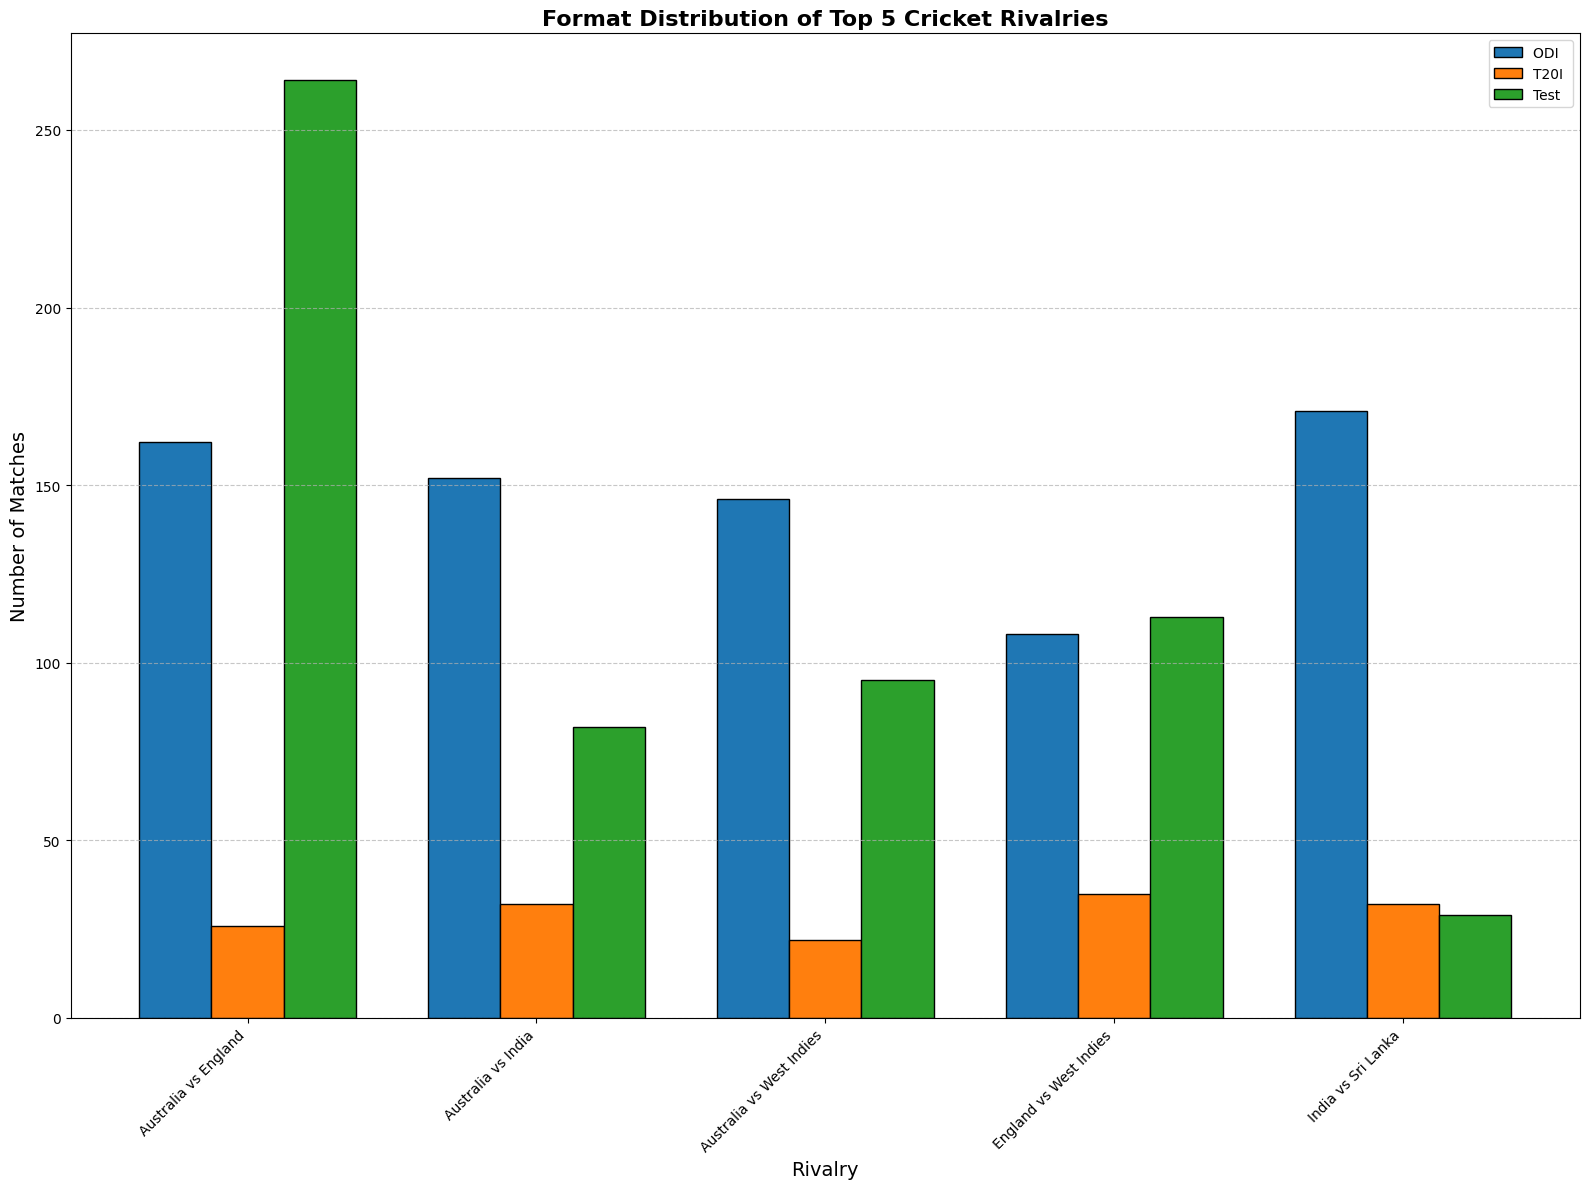

In [99]:
# Create a grouped bar chart for format-specific rivalry analysis
plt.figure(figsize=(16, 12))

# Get unique formats
formats = top_rivalry_formats['format'].unique()
matchups = top_rivalry_formats['matchup'].unique()

# Set up the plot
bar_width = 0.25
index = np.arange(len(matchups))

# Plot bars for each format
for i, format_name in enumerate(formats):
    format_data = top_rivalry_formats[top_rivalry_formats['format'] == format_name]
    format_data = format_data.set_index('matchup')
    
    # Ensure all matchups are in the data
    matches_by_matchup = [format_data.loc[m, 'format_matches'] if m in format_data.index else 0 for m in matchups]
    
    plt.bar(
        index + i*bar_width, 
        matches_by_matchup,
        bar_width,
        label=format_name,
        edgecolor='black',
        linewidth=1
    )

# Add chart title and labels
plt.title('Format Distribution of Top 5 Cricket Rivalries', fontsize=16, fontweight='bold')
plt.xlabel('Rivalry', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.xticks(index + bar_width, matchups, rotation=45, ha='right')
plt.legend()

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**7.  Interactive Network Visualization of team rivalries:**

In [100]:
# Filter for significant rivalries (at least 10 matches)
network_data = h2h_stats[h2h_stats['total_matches'] >= 10].copy()
network_data

,team_A,team_B,total_matches,team_A_wins,team_B_wins,draws_no_results,team_A_win_pct,team_B_win_pct,max_win_pct,min_win_pct,dominance_ratio,competitiveness,intensity
1,Afghanistan,Bangladesh,33,16.0,17.0,0.0,48.5,51.5,51.5,48.5,1.06,0.970,32.010
3,Afghanistan,India,14,0.0,11.0,3.0,0.0,78.6,78.6,0.0,78.60,0.214,2.996
4,Afghanistan,Ireland,60,37.0,21.0,2.0,61.7,35.0,61.7,35.0,1.76,0.733,43.980
6,Afghanistan,Pakistan,15,4.0,11.0,0.0,26.7,73.3,73.3,26.7,2.75,0.534,8.010
8,Afghanistan,Sri Lanka,24,7.0,16.0,1.0,29.2,66.7,66.7,29.2,2.28,0.625,15.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,South Africa,West Indies,116,80.0,33.0,3.0,69.0,28.4,69.0,28.4,2.43,0.594,68.904
65,South Africa,Zimbabwe,55,51.0,2.0,2.0,92.7,3.6,92.7,3.6,25.75,0.109,5.995
66,Sri Lanka,West Indies,100,53.0,44.0,3.0,53.0,44.0,53.0,44.0,1.20,0.910,91.000
67,Sri Lanka,Zimbabwe,84,68.0,13.0,3.0,81.0,15.5,81.0,15.5,5.23,0.345,28.980


In [101]:
# Create a list of nodes (teams)
teams = set(network_data['team_A'].tolist() + network_data['team_B'].tolist())
nodes = [{'id': team, 'label': team, 'size': 10} for team in teams]

In [102]:
# Create a list of edges (rivalries)
edges = []
for _, row in network_data.iterrows():
    edges.append({
        'source': row['team_A'],
        'target': row['team_B'],
        'value': row['total_matches'],
        'title': f"{row['team_A']} vs {row['team_B']}: {int(row['total_matches'])} matches"
    })

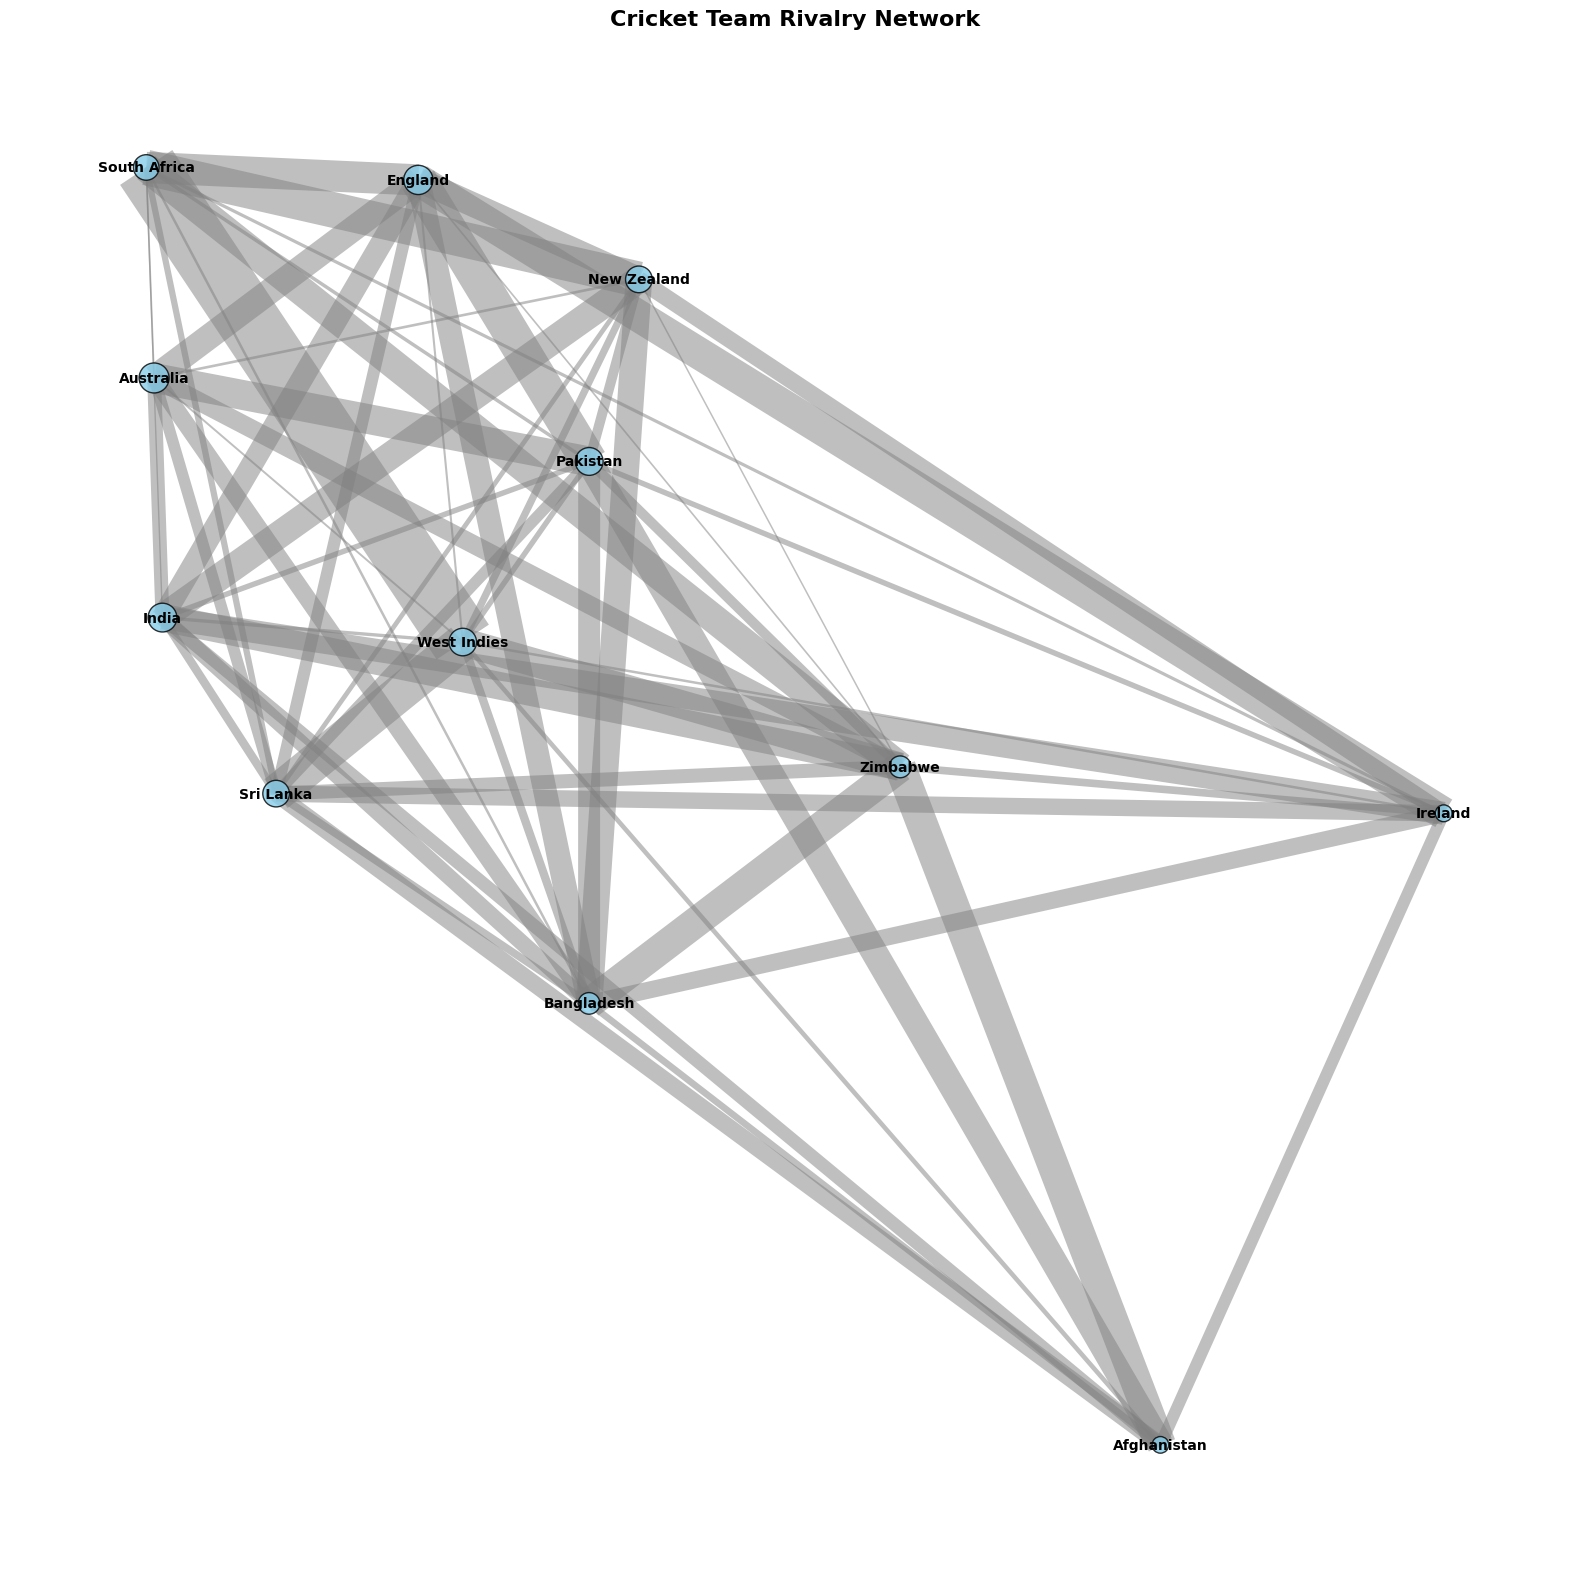

In [ ]:
# create a network visualization using matplotlib
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes
for node in nodes:
    G.add_node(node['id'], label=node['label'], size=node['size'])

# Add edges
for edge in edges:
    G.add_edge(edge['source'], edge['target'], weight=edge['value'], title=edge['title'])

# Calculate node sizes based on total matches played
node_sizes = {}
for team in teams:
    team_matches = sum([edge['value'] for edge in edges if edge['source'] == team or edge['target'] == team])
    node_sizes[team] = 100 + team_matches / 5  # Scale for visibility

# Calculate edge widths based on matches played
edge_widths = [edge['value'] / 10 for edge in edges]

# Calculate node positions using a spring layout
pos = nx.spring_layout(G, k=0.3, iterations=50)

# Create the plot
plt.figure(figsize=(16, 16))

# Draw nodes
nx.draw_networkx_nodes(
    G, pos,
    node_size=[node_sizes[node] for node in G.nodes()],
    node_color='skyblue',
    edgecolors='black',
    alpha=0.8
)

# Draw edges
nx.draw_networkx_edges(
    G, pos,
    width=edge_widths,
    alpha=0.5,
    edge_color='gray'
)

# Draw labels
nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_weight='bold'
)

# Add title
plt.title('Cricket Team Rivalry Network', fontsize=16, fontweight='bold')

# Remove axis
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()

**8. Identify the most one-sided and most competitive rivalries:**

Now, identify the `most one-sided` and `most competitive rivalries` among significant matchups.

In [104]:
# Filter for significant rivalries (at least 20 matches)
significant_h2h = h2h_stats[h2h_stats['total_matches'] >= 20].copy()
significant_h2h

,team_A,team_B,total_matches,team_A_wins,team_B_wins,draws_no_results,team_A_win_pct,team_B_win_pct,max_win_pct,min_win_pct,dominance_ratio,competitiveness,intensity
1,Afghanistan,Bangladesh,33,16.0,17.0,0.0,48.5,51.5,51.5,48.5,1.06,0.970,32.010
4,Afghanistan,Ireland,60,37.0,21.0,2.0,61.7,35.0,61.7,35.0,1.76,0.733,43.980
8,Afghanistan,Sri Lanka,24,7.0,16.0,1.0,29.2,66.7,66.7,29.2,2.28,0.625,15.000
10,Afghanistan,Zimbabwe,52,38.0,13.0,1.0,73.1,25.0,73.1,25.0,2.92,0.519,26.988
11,Australia,Bangladesh,39,32.0,6.0,1.0,82.1,15.4,82.1,15.4,5.33,0.333,12.987
12,Australia,England,452,256.0,189.0,7.0,56.6,41.8,56.6,41.8,1.35,0.852,385.104
14,Australia,India,266,143.0,111.0,12.0,53.8,41.7,53.8,41.7,1.29,0.879,233.814
16,Australia,New Zealand,205,145.0,52.0,8.0,70.7,25.4,70.7,25.4,2.78,0.547,112.135
17,Australia,Pakistan,191,122.0,63.0,6.0,63.9,33.0,63.9,33.0,1.94,0.691,131.981
18,Australia,South Africa,215,122.0,89.0,4.0,56.7,41.4,56.7,41.4,1.37,0.847,182.105


In [105]:
# Create a readable matchup column
significant_h2h['matchup'] = significant_h2h['team_A'] + ' vs ' + significant_h2h['team_B']
significant_h2h['win_ratio'] = significant_h2h.apply(
    lambda x: max(x['team_A_win_pct'], x['team_B_win_pct']) / min(x['team_A_win_pct'], x['team_B_win_pct']) 
    if min(x['team_A_win_pct'], x['team_B_win_pct']) > 0 else float('inf'), 
    axis=1
)
significant_h2h

,team_A,team_B,total_matches,team_A_wins,team_B_wins,draws_no_results,team_A_win_pct,team_B_win_pct,max_win_pct,min_win_pct,dominance_ratio,competitiveness,intensity,matchup,win_ratio
1,Afghanistan,Bangladesh,33,16.0,17.0,0.0,48.5,51.5,51.5,48.5,1.06,0.970,32.010,Afghanistan vs Bangladesh,1.061856
4,Afghanistan,Ireland,60,37.0,21.0,2.0,61.7,35.0,61.7,35.0,1.76,0.733,43.980,Afghanistan vs Ireland,1.762857
8,Afghanistan,Sri Lanka,24,7.0,16.0,1.0,29.2,66.7,66.7,29.2,2.28,0.625,15.000,Afghanistan vs Sri Lanka,2.284247
10,Afghanistan,Zimbabwe,52,38.0,13.0,1.0,73.1,25.0,73.1,25.0,2.92,0.519,26.988,Afghanistan vs Zimbabwe,2.924000
11,Australia,Bangladesh,39,32.0,6.0,1.0,82.1,15.4,82.1,15.4,5.33,0.333,12.987,Australia vs Bangladesh,5.331169
12,Australia,England,452,256.0,189.0,7.0,56.6,41.8,56.6,41.8,1.35,0.852,385.104,Australia vs England,1.354067
14,Australia,India,266,143.0,111.0,12.0,53.8,41.7,53.8,41.7,1.29,0.879,233.814,Australia vs India,1.290168
16,Australia,New Zealand,205,145.0,52.0,8.0,70.7,25.4,70.7,25.4,2.78,0.547,112.135,Australia vs New Zealand,2.783465
17,Australia,Pakistan,191,122.0,63.0,6.0,63.9,33.0,63.9,33.0,1.94,0.691,131.981,Australia vs Pakistan,1.936364
18,Australia,South Africa,215,122.0,89.0,4.0,56.7,41.4,56.7,41.4,1.37,0.847,182.105,Australia vs South Africa,1.369565


In [106]:
# Find the most one-sided rivalries
one_sided_rivalries = significant_h2h.sort_values('win_ratio', ascending=False).head(10)
print("\nMost One-Sided Significant Rivalries (min 20 matches):")
for _, row in one_sided_rivalries.iterrows():
    dominant_team = row['team_A'] if row['team_A_win_pct'] > row['team_B_win_pct'] else row['team_B']
    dominated_team = row['team_B'] if dominant_team == row['team_A'] else row['team_A']
    dominant_pct = max(row['team_A_win_pct'], row['team_B_win_pct'])
    dominated_pct = min(row['team_A_win_pct'], row['team_B_win_pct'])
    print(f"{row['matchup']}: {int(row['total_matches'])} matches - {dominant_team} dominates with {dominant_pct}% vs {dominated_team}'s {dominated_pct}%")



Most One-Sided Significant Rivalries (min 20 matches):
South Africa vs Zimbabwe: 55 matches - South Africa dominates with 92.7% vs Zimbabwe's 3.6%
Australia vs Zimbabwe: 39 matches - Australia dominates with 87.2% vs Zimbabwe's 10.3%
Pakistan vs Zimbabwe: 101 matches - Pakistan dominates with 85.1% vs Zimbabwe's 10.9%
Bangladesh vs South Africa: 48 matches - South Africa dominates with 87.5% vs Bangladesh's 12.5%
Bangladesh vs India: 72 matches - India dominates with 86.1% vs Bangladesh's 12.5%
Bangladesh vs Pakistan: 72 matches - Pakistan dominates with 86.1% vs Bangladesh's 13.9%
Australia vs Bangladesh: 39 matches - Australia dominates with 82.1% vs Bangladesh's 15.4%
Sri Lanka vs Zimbabwe: 84 matches - Sri Lanka dominates with 81.0% vs Zimbabwe's 15.5%
New Zealand vs Zimbabwe: 55 matches - New Zealand dominates with 80.0% vs Zimbabwe's 16.4%
India vs Zimbabwe: 88 matches - India dominates with 80.7% vs Zimbabwe's 17.0%


In [107]:
# Find the most competitive rivalries
competitive_rivalries = significant_h2h.sort_values('competitiveness', ascending=False).head(10)
print("\nMost Competitive Significant Rivalries (min 20 matches):")
for _, row in competitive_rivalries.iterrows():
    print(f"{row['matchup']}: {int(row['total_matches'])} matches - {row['team_A']}: {row['team_A_win_pct']}%, {row['team_B']}: {row['team_B_win_pct']}%")


Most Competitive Significant Rivalries (min 20 matches):
England vs West Indies: 256 matches - England: 48.4%, West Indies: 48.8%
England vs India: 225 matches - England: 47.6%, India: 50.2%
Afghanistan vs Bangladesh: 33 matches - Afghanistan: 48.5%, Bangladesh: 51.5%
Pakistan vs West Indies: 199 matches - Pakistan: 50.3%, West Indies: 46.7%
India vs South Africa: 159 matches - India: 46.5%, South Africa: 50.9%
India vs West Indies: 225 matches - India: 50.7%, West Indies: 46.2%
Ireland vs Zimbabwe: 45 matches - Ireland: 46.7%, Zimbabwe: 40.0%
New Zealand vs West Indies: 118 matches - New Zealand: 48.3%, West Indies: 41.5%
India vs Pakistan: 170 matches - India: 44.7%, Pakistan: 51.8%
New Zealand vs Pakistan: 210 matches - New Zealand: 44.8%, Pakistan: 52.4%


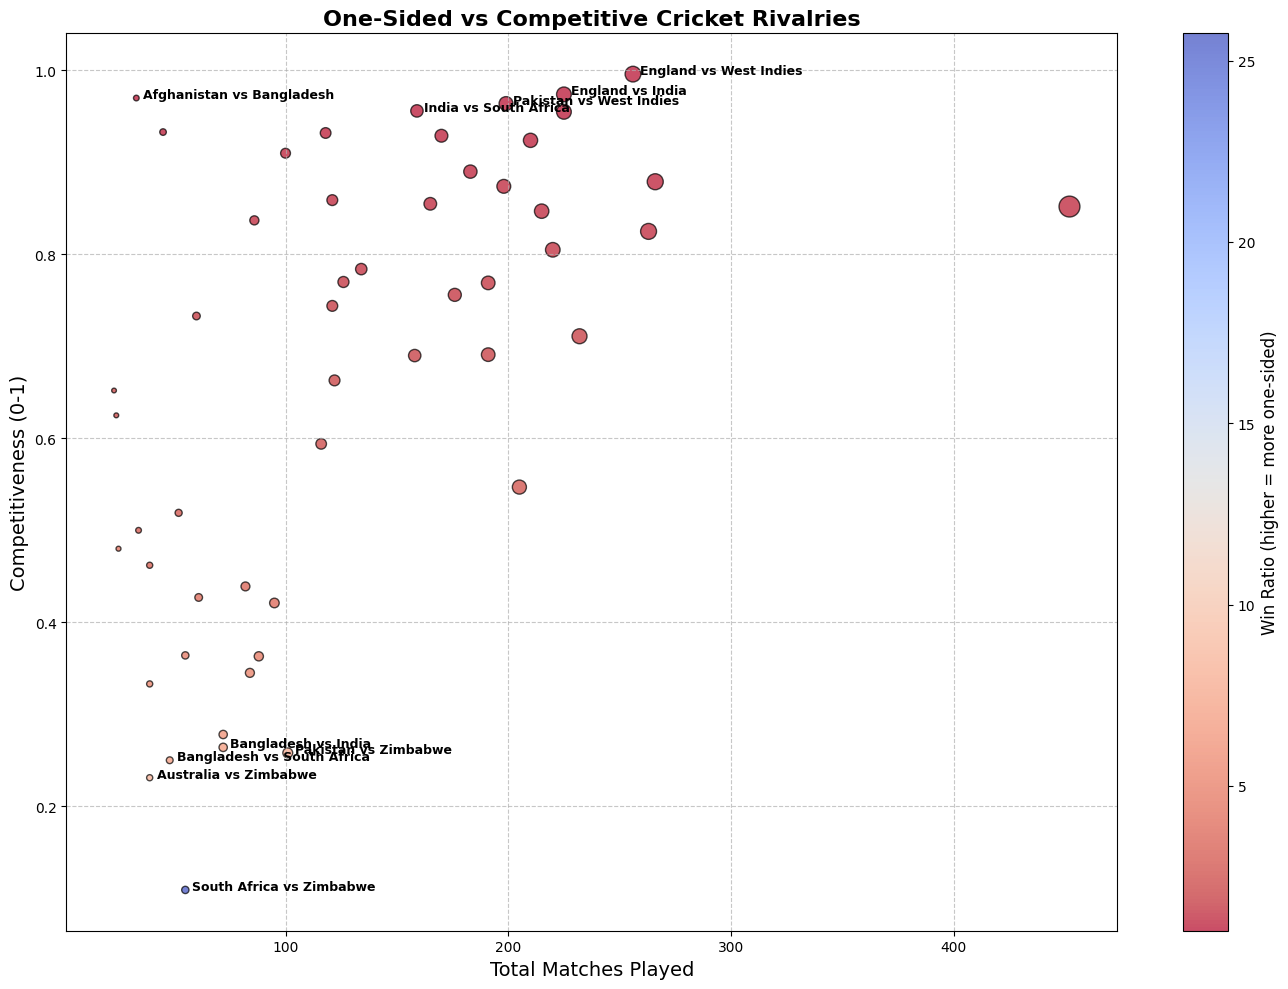

In [108]:
# Create a visualization comparing one-sided vs competitive rivalries
plt.figure(figsize=(14, 10))

# Create a scatter plot
plt.scatter(
    significant_h2h['total_matches'],
    significant_h2h['competitiveness'],
    s=significant_h2h['total_matches'] / 2,
    c=significant_h2h['win_ratio'],
    cmap='coolwarm_r',
    alpha=0.7,
    edgecolors='black'
)

# Add labels for the most one-sided and most competitive rivalries
for _, row in pd.concat([one_sided_rivalries.head(5), competitive_rivalries.head(5)]).drop_duplicates().iterrows():
    plt.annotate(
        row['matchup'],
        (row['total_matches'], row['competitiveness']),
        xytext=(5, 0),
        textcoords='offset points',
        fontsize=9,
        fontweight='bold'
    )

# Add chart title and labels
plt.title('One-Sided vs Competitive Cricket Rivalries', fontsize=16, fontweight='bold')
plt.xlabel('Total Matches Played', fontsize=14)
plt.ylabel('Competitiveness (0-1)', fontsize=14)

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Win Ratio (higher = more one-sided)', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**9. Draw conclusions and marketing recommendations:**

In [109]:
# Identify key insights from the head-to-head analysis
top_rivalry = h2h_stats.sort_values('total_matches', ascending=False).iloc[0]
most_competitive = significant_h2h.sort_values('competitiveness', ascending=False).iloc[0]
most_one_sided = significant_h2h.sort_values('win_ratio', ascending=False).iloc[0]

In [110]:
top_rivalry

team_A              Australia
team_B                England
total_matches             452
team_A_wins             256.0
team_B_wins             189.0
draws_no_results          7.0
team_A_win_pct           56.6
team_B_win_pct           41.8
max_win_pct              56.6
min_win_pct              41.8
dominance_ratio          1.35
competitiveness         0.852
intensity             385.104
Name: 12, dtype: object

In [111]:
most_competitive

team_A                             England
team_B                         West Indies
total_matches                          256
team_A_wins                          124.0
team_B_wins                          125.0
draws_no_results                       7.0
team_A_win_pct                        48.4
team_B_win_pct                        48.8
max_win_pct                           48.8
min_win_pct                           48.4
dominance_ratio                       1.01
competitiveness                      0.996
intensity                          254.976
matchup             England vs West Indies
win_ratio                         1.008264
Name: 37, dtype: object

In [112]:
most_one_sided

team_A                          South Africa
team_B                              Zimbabwe
total_matches                             55
team_A_wins                             51.0
team_B_wins                              2.0
draws_no_results                         2.0
team_A_win_pct                          92.7
team_B_win_pct                           3.6
max_win_pct                             92.7
min_win_pct                              3.6
dominance_ratio                        25.75
competitiveness                        0.109
intensity                              5.995
matchup             South Africa vs Zimbabwe
win_ratio                              25.75
Name: 65, dtype: object

In [113]:
# Format-specific insights
format_insights = []
for format_name in format_stats['format'].unique():
    format_data = format_stats[format_stats['format'] == format_name]
    if not format_data.empty:
        top_format_rivalry = format_data.sort_values('format_matches', ascending=False).iloc[0]
        format_insights.append({
            'format': format_name,
            'top_rivalry': f"{top_format_rivalry['team_A']} vs {top_format_rivalry['team_B']}",
            'matches': int(top_format_rivalry['format_matches']),
            'competitiveness': abs(top_format_rivalry['team_A_format_win_pct'] - top_format_rivalry['team_B_format_win_pct'])
        })


In [117]:
format_insights

[{'format': 'ODI ',
  'top_rivalry': 'India vs Sri Lanka',
  'matches': 171,
  'competitiveness': np.float64(23.4)},
 {'format': 'T20I ',
  'top_rivalry': 'New Zealand vs Pakistan',
  'matches': 49,
  'competitiveness': np.float64(2.1000000000000014)},
 {'format': 'Test ',
  'top_rivalry': 'Australia vs England',
  'matches': 264,
  'competitiveness': np.float64(15.200000000000003)}]

In [116]:
# conclusions
print("\nConclusions on Head-to-Head Results:")
print(f"1. Most Frequent Rivalry: {top_rivalry['team_A']} vs {top_rivalry['team_B']} with {int(top_rivalry['total_matches'])} matches")
print(f"2. Most Competitive Significant Rivalry: {most_competitive['matchup']} with {most_competitive['competitiveness']:.2f} competitiveness score")
print(f"3. Most One-Sided Significant Rivalry: {most_one_sided['matchup']} with a win ratio of {most_one_sided['win_ratio']:.2f}")

print("\nFormat-specific insights:")
for insight in format_insights:
    print(f"- Top {insight['format']} rivalry: {insight['top_rivalry']} with {insight['matches']} matches")



Conclusions on Head-to-Head Results:
1. Most Frequent Rivalry: Australia vs England with 452 matches
2. Most Competitive Significant Rivalry: England vs West Indies with 1.00 competitiveness score
3. Most One-Sided Significant Rivalry: South Africa vs Zimbabwe with a win ratio of 25.75

Format-specific insights:
- Top ODI  rivalry: India vs Sri Lanka with 171 matches
- Top T20I  rivalry: New Zealand vs Pakistan with 49 matches
- Top Test  rivalry: Australia vs England with 264 matches


In [115]:
# recommendations
print("\nMarketing Recommendations Based on Rivalry Analysis:")
print("1. Flagship Rivalry Events: Create special branded series for the most frequent rivalries like " 
      f"{top_rivalry['team_A']} vs {top_rivalry['team_B']}, with unique trophies and historical context.")

print("2. Competitive Balance Promotion: Highlight the close competition in rivalries like "
      f"{most_competitive['matchup']} with marketing that emphasizes the unpredictability and excitement.")

print("3. Format-Specific Rivalry Marketing: Develop format-specific rivalry narratives, such as "
      f"'{format_insights[0]['top_rivalry']}' for {format_insights[0]['format']} cricket.")

print("4. Historical Rivalry Storytelling: Create documentary content about the evolution of key rivalries, "
      "featuring iconic moments, legendary players, and cultural significance.")

print("5. Underdog Narratives: For one-sided rivalries, develop marketing around potential upset stories "
      "and the underdog team's quest to overcome historical disadvantages.")

print("6. Rivalry Statistics Hub: Develop an interactive digital platform where fans can explore "
      "head-to-head statistics, historical trends, and memorable moments from cricket rivalries.")

print("7. Rivalry-Based Fantasy Games: Create fantasy cricket games specifically focused on rivalry "
      "matches, with special scoring systems that reward performance in high-pressure rivalry situations.")

print("8. Local Derby Promotion: For teams from neighboring countries or regions, emphasize the "
      "geographical and cultural aspects of the rivalry to engage local fan bases.")

print("9. Rivalry Merchandise Collections: Develop co-branded merchandise that celebrates iconic "
      "rivalries, featuring both teams' colors and historical match statistics.")

print("10. Social Media Rivalry Campaigns: Create hashtag campaigns and social media content series "
       "that build anticipation before key rivalry matches and encourage fan engagement.")


Marketing Recommendations Based on Rivalry Analysis:
1. Flagship Rivalry Events: Create special branded series for the most frequent rivalries like Australia vs England, with unique trophies and historical context.
2. Competitive Balance Promotion: Highlight the close competition in rivalries like England vs West Indies with marketing that emphasizes the unpredictability and excitement.
3. Format-Specific Rivalry Marketing: Develop format-specific rivalry narratives, such as 'India vs Sri Lanka' for ODI  cricket.
4. Historical Rivalry Storytelling: Create documentary content about the evolution of key rivalries, featuring iconic moments, legendary players, and cultural significance.
5. Underdog Narratives: For one-sided rivalries, develop marketing around potential upset stories and the underdog team's quest to overcome historical disadvantages.
6. Rivalry Statistics Hub: Develop an interactive digital platform where fans can explore head-to-head statistics, historical trends, and mem

---------------

## 9. **Performance in Neutral Venues:**

**1. Filter for neutral venue matches:**

First, lets identify matches played at neutral venues.

In [126]:
# Filter for neutral venue matches
neutral_venue_data = data[data['is_neutral_ground'] == True]

# Display the first few rows of the filtered dataset
print(f"Total matches in neutral venues: {len(neutral_venue_data)}")
print("\nSample of neutral venue matches:")
print(neutral_venue_data[['team_1', 'team_2', 'winner', 'ground', 'ground_country']].head())

Total matches in neutral venues: 1790

Sample of neutral venue matches:
   team_1    team_2     winner         ground ground_country
59  India  Pakistan      India   Dubai (DICS)            UAE
61  India  Pakistan      India  Colombo (RPS)      Sri Lanka
62  India  Pakistan  no result      Pallekele      Sri Lanka
63  India  Pakistan      India     Manchester        England
64  India  Pakistan      India   Dubai (DICS)            UAE


**2.  Count wins by team in neutral venues:**

Now, let's count the number of wins for each team in neutral venues.

In [127]:
# Group by winner and count the number of wins in neutral venues
neutral_venue_wins = neutral_venue_data['winner'].value_counts().reset_index()
neutral_venue_wins.columns = ['Team', 'Neutral_Venue_Wins']

# Display the top teams by wins in neutral venues
print("\nTop teams by wins in neutral venues:")
print(neutral_venue_wins.head(10))


Top teams by wins in neutral venues:
           Team  Neutral_Venue_Wins
0      Pakistan                 307
1         India                 239
2  South Africa                 198
3     Australia                 194
4   New Zealand                 178
5   West Indies                 158
6     Sri Lanka                 150
7       England                 147
8   Afghanistan                  73
9     no result                  46


**3. Calculate total matches played by each team in neutral venues:**

Let's calculate the total number of matches each team has played in neutral venues.

In [128]:
# Create a function to count team appearances
def count_team_appearances(df, team_col):
    return df[team_col].value_counts().reset_index()

# Count appearances as team_1
team1_appearances = count_team_appearances(neutral_venue_data, 'team_1')
team1_appearances.columns = ['Team', 'Team1_Appearances']

# Count appearances as team_2
team2_appearances = count_team_appearances(neutral_venue_data, 'team_2')
team2_appearances.columns = ['Team', 'Team2_Appearances']

# Merge the appearance counts
team_appearances = pd.merge(team1_appearances, team2_appearances, on='Team', how='outer').fillna(0)

# Calculate total appearances
team_appearances['Total_Neutral_Matches'] = team_appearances['Team1_Appearances'] + team_appearances['Team2_Appearances']
team_appearances = team_appearances[['Team', 'Total_Neutral_Matches']]

# Display the total matches played by each team
print("\nTotal matches played by each team in neutral venues:")
print(team_appearances.sort_values('Total_Neutral_Matches', ascending=False).head(10))


Total matches played by each team in neutral venues:
            Team  Total_Neutral_Matches
8       Pakistan                  584.0
5          India                  428.0
10     Sri Lanka                  386.0
7    New Zealand                  384.0
11   West Indies                  347.0
9   South Africa                  330.0
1      Australia                  308.0
3        England                  267.0
0    Afghanistan                  153.0
12      Zimbabwe                  151.0


**4. Calculate win percentage in neutral venues:**

Now, let's calculate the win percentage for each team in neutral venues.

In [129]:
# Step 4: Calculate win percentage in neutral venues
# Merge wins and total matches
neutral_venue_performance = pd.merge(neutral_venue_wins, team_appearances, on='Team', how='outer').fillna(0)

# Calculate win percentage
neutral_venue_performance['Win_Percentage'] = (neutral_venue_performance['Neutral_Venue_Wins'] / 
                                              neutral_venue_performance['Total_Neutral_Matches'] * 100).round(1)

# Sort by win percentage (for teams with at least 10 matches)
significant_teams = neutral_venue_performance[neutral_venue_performance['Total_Neutral_Matches'] >= 10].copy()
significant_teams = significant_teams.sort_values('Win_Percentage', ascending=False)

# Display the performance metrics
print("\nTeam performance in neutral venues (minimum 10 matches):")
print(significant_teams[['Team', 'Neutral_Venue_Wins', 'Total_Neutral_Matches', 'Win_Percentage']])


Team performance in neutral venues (minimum 10 matches):
            Team  Neutral_Venue_Wins  Total_Neutral_Matches  Win_Percentage
1      Australia               194.0                  308.0            63.0
9   South Africa               198.0                  330.0            60.0
5          India               239.0                  428.0            55.8
3        England               147.0                  267.0            55.1
8       Pakistan               307.0                  584.0            52.6
0    Afghanistan                73.0                  153.0            47.7
7    New Zealand               178.0                  384.0            46.4
11   West Indies               158.0                  347.0            45.5
10     Sri Lanka               150.0                  386.0            38.9
6        Ireland                24.0                   92.0            26.1
12      Zimbabwe                30.0                  151.0            19.9
2     Bangladesh              

**5. Compare neutral venue performance with overall performance:**

Let's compare each team's performance in neutral venues with their overall performance.

In [130]:
# Step 5: Compare neutral venue performance with overall performance
# Count overall wins for each team
overall_wins = data['winner'].value_counts().reset_index()
overall_wins.columns = ['Team', 'Overall_Wins']

# Count overall matches for each team
team1_overall = count_team_appearances(data, 'team_1')
team1_overall.columns = ['Team', 'Team1_Overall']

team2_overall = count_team_appearances(data, 'team_2')
team2_overall.columns = ['Team', 'Team2_Overall']

overall_appearances = pd.merge(team1_overall, team2_overall, on='Team', how='outer').fillna(0)
overall_appearances['Total_Overall_Matches'] = overall_appearances['Team1_Overall'] + overall_appearances['Team2_Overall']

# Merge with overall wins
overall_performance = pd.merge(overall_wins, overall_appearances[['Team', 'Total_Overall_Matches']], on='Team', how='outer').fillna(0)

# Calculate overall win percentage
overall_performance['Overall_Win_Percentage'] = (overall_performance['Overall_Wins'] / 
                                               overall_performance['Total_Overall_Matches'] * 100).round(1)

# Merge with neutral venue performance
comparative_performance = pd.merge(significant_teams, 
                                  overall_performance[['Team', 'Overall_Wins', 'Total_Overall_Matches', 'Overall_Win_Percentage']], 
                                  on='Team', how='left')

# Calculate the difference in win percentage (neutral vs overall)
comparative_performance['Win_Percentage_Difference'] = (comparative_performance['Win_Percentage'] - 
                                                      comparative_performance['Overall_Win_Percentage']).round(1)

# Sort by the difference to see which teams perform better or worse in neutral venues
comparative_performance = comparative_performance.sort_values('Win_Percentage_Difference', ascending=False)

# Display the comparative performance
print("\nComparative performance (neutral venues vs overall):")
print(comparative_performance[['Team', 'Win_Percentage', 'Overall_Win_Percentage', 'Win_Percentage_Difference']])


Comparative performance (neutral venues vs overall):
            Team  Win_Percentage  Overall_Win_Percentage  \
3        England            55.1                    51.7   
1   South Africa            60.0                    56.9   
0      Australia            63.0                    60.7   
2          India            55.8                    53.6   
6    New Zealand            46.4                    44.3   
9        Ireland            26.1                    24.7   
5    Afghanistan            47.7                    46.7   
4       Pakistan            52.6                    51.7   
7    West Indies            45.5                    46.0   
10      Zimbabwe            19.9                    20.4   
8      Sri Lanka            38.9                    44.6   
11    Bangladesh            19.5                    30.9   

    Win_Percentage_Difference  
3                         3.4  
1                         3.1  
0                         2.3  
2                         2.2  
6    

**6.  Analyze performance by format in neutral venues:**

Let's examine how teams perform in different formats at neutral venues.

In [131]:
# Step 6: Analyze performance by format in neutral venues
# Group by winner and format
format_wins = neutral_venue_data.groupby(['winner', 'format']).size().reset_index(name='Format_Wins')

# Create a pivot table for easier visualization
format_pivot = format_wins.pivot(index='winner', columns='format', values='Format_Wins').fillna(0)

# Calculate total matches by team and format
team_format_matches = pd.DataFrame()

for team in significant_teams['Team']:
    # Count matches where the team participated in each format
    team_formats = neutral_venue_data[
        (neutral_venue_data['team_1'] == team) | 
        (neutral_venue_data['team_2'] == team)
    ]['format'].value_counts().reset_index()
    
    team_formats.columns = ['format', 'matches']
    team_formats['Team'] = team
    
    team_format_matches = pd.concat([team_format_matches, team_formats])

# Calculate win percentage by format
format_performance = pd.DataFrame()

for team in significant_teams['Team']:
    for format_name in neutral_venue_data['format'].unique():
        # Total matches in this format
        total_format = team_format_matches[
            (team_format_matches['Team'] == team) & 
            (team_format_matches['format'] == format_name)
        ]['matches'].sum()
        
        # Wins in this format
        format_win = format_wins[
            (format_wins['winner'] == team) & 
            (format_wins['format'] == format_name)
        ]['Format_Wins'].sum()
        
        # Calculate win percentage
        if total_format > 0:
            win_pct = (format_win / total_format * 100).round(1)
        else:
            win_pct = 0
            
        # Add to dataframe
        format_performance = pd.concat([
            format_performance, 
            pd.DataFrame({
                'Team': [team],
                'format': [format_name],
                'matches': [total_format],
                'wins': [format_win],
                'win_percentage': [win_pct]
            })
        ])

# Filter for teams with at least 5 matches in a format
format_performance = format_performance[format_performance['matches'] >= 5]

# Display format-specific performance
print("\nFormat-specific performance in neutral venues (minimum 5 matches):")
for format_name in neutral_venue_data['format'].unique():
    format_data = format_performance[format_performance['format'] == format_name].sort_values('win_percentage', ascending=False)
    if not format_data.empty:
        print(f"\n{format_name} format:")
        print(format_data[['Team', 'matches', 'wins', 'win_percentage']].head(5))


Format-specific performance in neutral venues (minimum 5 matches):

ODI  format:
           Team  matches  wins  win_percentage
0     Australia      204   137            67.2
0  South Africa      208   130            62.5
0         India      342   184            53.8
0      Pakistan      429   223            52.0
0       England      164    81            49.4

T20I  format:
           Team  matches  wins  win_percentage
0         India       65    44            67.7
0       England       67    43            64.2
0   Afghanistan       66    38            57.6
0  South Africa       62    35            56.5
0      Pakistan      112    62            55.4

Test  format:
           Team  matches  wins  win_percentage
0     Australia       38    26            68.4
0       England       36    23            63.9
0  South Africa       60    33            55.0
0         India       21    11            52.4
0      Pakistan       43    22            51.2


**7. Create visualizations for neutral venue performance:**

Finally, let's create visualizations to illustrate team performance in neutral venues.

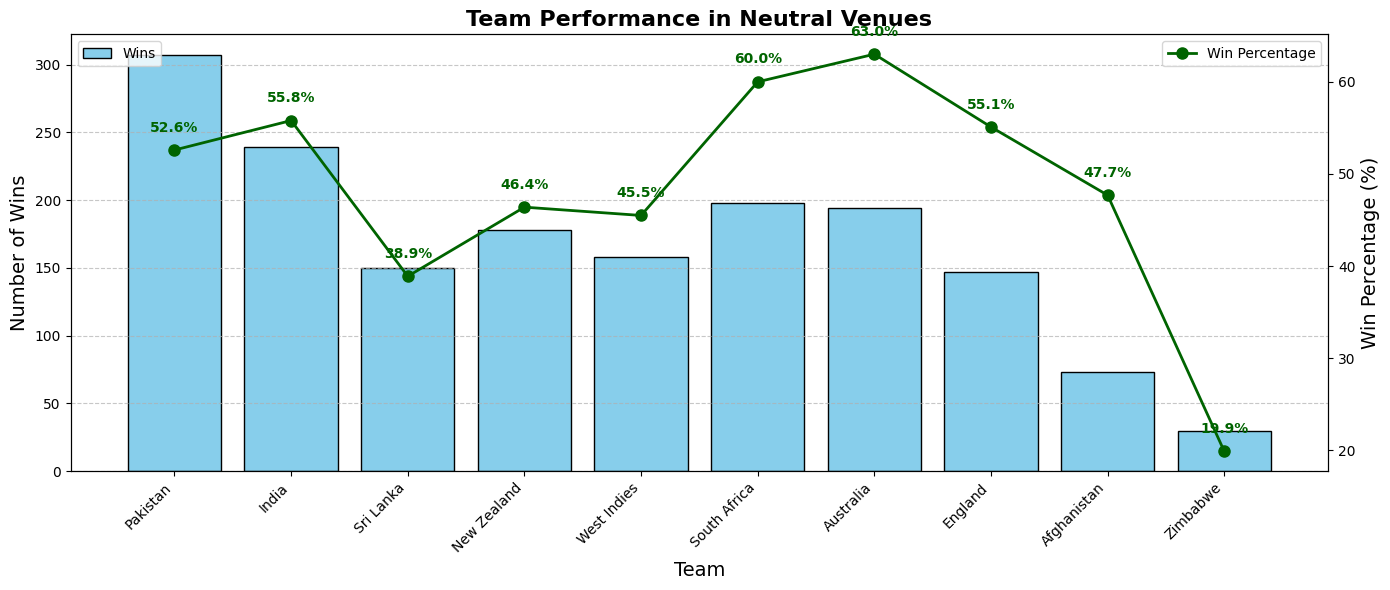

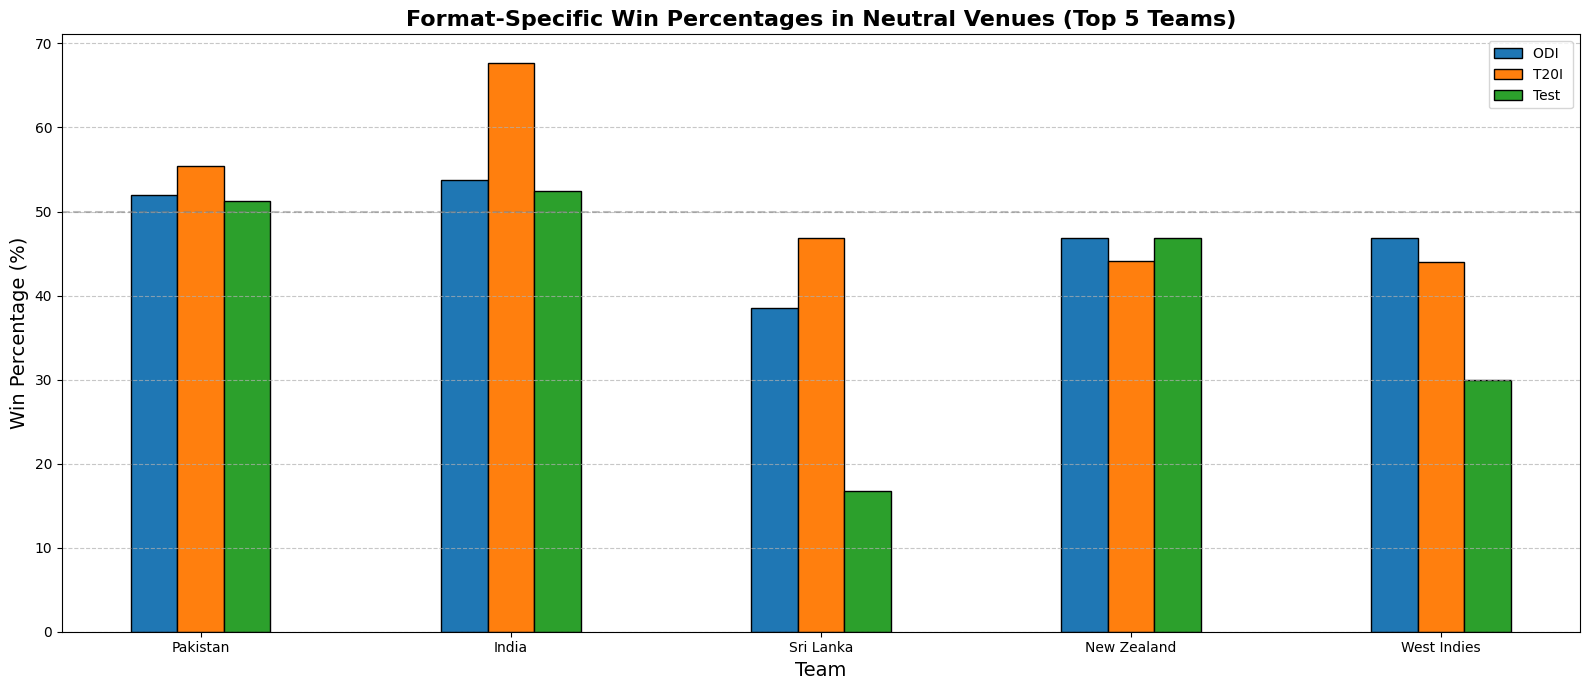

In [136]:
# Select the top 10 teams by total matches in neutral venues
top_teams = significant_teams.sort_values('Total_Neutral_Matches', ascending=False).head(10)

# Create a grouped bar chart
plt.figure(figsize=(14, 6))

# Bar for wins
plt.bar(
    top_teams['Team'], 
    top_teams['Neutral_Venue_Wins'], 
    color='skyblue', 
    label='Wins', 
    edgecolor='black'
)

# Line for win percentage
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(
    top_teams['Team'], 
    top_teams['Win_Percentage'], 
    color='darkgreen', 
    marker='o', 
    linewidth=2,
    markersize=8,
    label='Win Percentage'
)

# Add labels and title
ax1.set_title('Team Performance in Neutral Venues', fontsize=16, fontweight='bold')
ax1.set_xlabel('Team', fontsize=14)
ax1.set_ylabel('Number of Wins', fontsize=14)
ax2.set_ylabel('Win Percentage (%)', fontsize=14)
ax1.set_xticklabels(top_teams['Team'], rotation=45, ha='right')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add grid for better readability
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add win percentage labels
for i, row in enumerate(top_teams.itertuples()):
    ax2.annotate(
        f"{row.Win_Percentage}%", 
        (i, row.Win_Percentage + 2),
        ha='center',
        fontweight='bold',
        color='darkgreen'
    )

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the chart
plt.show()

# Create a second visualization: Format-specific performance for top 5 teams
top5_teams = significant_teams.sort_values('Total_Neutral_Matches', ascending=False).head(5)['Team'].tolist()
format_data_top5 = format_performance[format_performance['Team'].isin(top5_teams)]

# Create a grouped bar chart by format
plt.figure(figsize=(16, 7))

# Set up the plot
formats = format_data_top5['format'].unique()
teams = top5_teams
bar_width = 0.15
index = np.arange(len(teams))

# Plot bars for each format
for i, format_name in enumerate(formats):
    format_data = format_data_top5[format_data_top5['format'] == format_name]
    
    # Create a dictionary for easier lookup
    team_win_pct = dict(zip(format_data['Team'], format_data['win_percentage']))
    
    # Get win percentages for each team (0 if not available)
    win_pcts = [team_win_pct.get(team, 0) for team in teams]
    
    plt.bar(
        index + i*bar_width, 
        win_pcts,
        bar_width,
        label=format_name,
        edgecolor='black'
    )

# Add chart title and labels
plt.title('Format-Specific Win Percentages in Neutral Venues (Top 5 Teams)', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Win Percentage (%)', fontsize=14)
plt.xticks(index + bar_width * (len(formats)-1)/2, teams)
plt.legend()

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line at 50% for reference
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.5)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

In [ ]:
# Draw conclusions:
print("\nConclusions on Performance in Neutral Venues:")
print("1. Teams with the highest win percentage in neutral venues: " + 
      ", ".join(significant_teams.head(3)['Team'].tolist()))

print("2. Teams that perform better in neutral venues than overall: " + 
      ", ".join(comparative_performance[comparative_performance['Win_Percentage_Difference'] > 0].head(3)['Team'].tolist()))

print("3. Teams that perform worse in neutral venues than overall: " + 
      ", ".join(comparative_performance[comparative_performance['Win_Percentage_Difference'] < 0].head(3)['Team'].tolist()))

# Recommendations for decision makers
print("\nRecommendations for ICC Tournament Strategy:")
print("1. Consider giving higher seeding to teams that perform well in neutral venues for ICC tournaments.")
print("2. Format-specific team selection should account for neutral venue performance in that format.")
print("3. Teams with poor neutral venue performance should prioritize more exposure matches in diverse conditions.")
print("4. Tournament scheduling should consider teams that draw larger crowds in neutral venues.")
print("5. Teams with significant performance drop in neutral venues may need specialized preparation programs.")


Conclusions on Performance in Neutral Venues:
1. Teams with the highest win percentage in neutral venues: Australia, South Africa, India
2. Teams that perform better in neutral venues than overall: England, South Africa, Australia
3. Teams that perform worse in neutral venues than overall: West Indies, Zimbabwe, Sri Lanka

Recommendations for ICC Tournament Strategy:
1. Consider giving higher seeding to teams that perform well in neutral venues for ICC tournaments.
2. Format-specific team selection should account for neutral venue performance in that format.
3. Teams with poor neutral venue performance should prioritize more exposure matches in diverse conditions.
4. Tournament scheduling should consider teams that draw larger crowds in neutral venues.
5. Teams with significant performance drop in neutral venues may need specialized preparation programs.
